In [1]:
from scipy import io
import pandas as pd

In [19]:
k562_tfs_7 = io.mmread('./GSE133344_filtered_matrix.mtx.gz')

In [20]:
k562_tfs_7.shape

(33694, 111668)

In [13]:
k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')

In [6]:
k562_tfs_7_cell.head()

,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,TTGAACGAGACTCGGA-2,ARID1A_NegCtrl0__ARID1A_NegCtrl0,28684,1809,15.856274,2,True,1
1,CGTTGGGGTGTTTGTG-7,BCORL1_NegCtrl0__BCORL1_NegCtrl0,18367,896,20.498884,7,True,1
2,GAACCTAAGTGTTAGA-6,FOSB_NegCtrl0__FOSB_NegCtrl0,16296,664,24.542169,6,True,1
3,CCTTCCCTCCGTCATC-4,SET_KLF1__SET_KLF1,16262,850,19.131765,4,True,1
4,TCAATCTGTCTTTCAT-2,OSR2_NegCtrl0__OSR2_NegCtrl0,16057,1067,15.048735,2,True,2


In [8]:
k562_tfs_7_cell['guide_identity'].unique().shape

(290,)

In [7]:
k562_tfs_7_raw_cell = pd.read_csv('./GSE133344_raw_cell_identities.csv.gz')

In [16]:
import numpy as np
np.setdiff1d(k562_tfs_7_raw_cell['guide_identity'].unique(), k562_tfs_7_cell['guide_identity'].unique())

array(['no_reads_found'], dtype=object)

In [26]:
ListUSE = []
ListUSEFalse = []
for i in range(k562_tfs_7_cell.shape[0]):
    listPer_i = k562_tfs_7_cell['guide_identity'][i].split('__')
    ListUSE.append(listPer_i[0] == listPer_i[1]) 
    ListUSEFalse.append(listPer_i[0] != listPer_i[1]) 

In [24]:
np.sum(ListUSE)

110815

In [31]:
# special cases where the former two do not match the latter two
k562_tfs_7_cell['guide_identity'][ListUSEFalse].unique()

array(['TGFBR2_IGDCC3__TGFBR2_IGDCC3_2',
       'HOXC13_NegCtrl0__HOXC13_NegCtrl0_1',
       'ZBTB10_NegCtrl0__ZBTB10_NegCtrl0_2',
       'ZBTB10_NegCtrl0__ZBTB10_NegCtrl0_1',
       'TGFBR2_IGDCC3__TGFBR2_IGDCC3_1',
       'HOXC13_NegCtrl0__HOXC13_NegCtrl0_2'], dtype=object)

In [27]:
k562_tfs_7_cell.shape[0] - np.sum(ListUSE)

630

In [32]:
k562_tfs_7_cellnames = pd.read_csv('./GSE133344_filtered_barcodes.tsv.gz',  compression='gzip', delimiter='\t', header = None)
k562_tfs_7_genenames = pd.read_csv('./GSE133344_filtered_genes.tsv.gz',  compression='gzip', delimiter='\t', header = None)

In [33]:
k562_tfs_7_cellnames.head()

,0
0,AAACCTGAGAAGAAGC-1
1,AAACCTGAGGCATGTG-1
2,AAACCTGAGGCCCTTG-1
3,AAACCTGCACGAAGCA-1
4,AAACCTGCAGACGTAG-1


In [34]:
k562_tfs_7_genenames.head()

,0,1
0,ENSG00000243485,RP11-34P13.3
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8


In [35]:
print(k562_tfs_7_cellnames.shape); print(k562_tfs_7_genenames.shape)

(111668, 1)
(33694, 2)


In [36]:
assert k562_tfs_7.shape[0] == k562_tfs_7_genenames.shape[0]
assert k562_tfs_7.shape[1] == k562_tfs_7_cellnames.shape[0]
print('There are {} cells and {} genes in k562_tfs_7 dataset!'.format(k562_tfs_7.shape[1], k562_tfs_7.shape[0]))

There are 111668 cells and 33694 genes in k562_tfs_7 dataset!


# Construct AnnData Object


In [3]:
from anndata import AnnData
from scipy.sparse import csr_matrix
import numpy as np

In [ ]:
X = k562_tfs_7.T.astype(np.float32)
X = csr_matrix(X)
print(X.shape)
print(type(X))

In [ ]:
k562_tfs_7_cellnames.head()

In [ ]:
k562_tfs_7_genenames.head()

In [ ]:
k562_tfs_7_var = pd.DataFrame(k562_tfs_7_genenames.iloc[:,0])
k562_tfs_7_var.columns = ['gene_ids']



In [ ]:
k562_tfs_7_genenames.iloc[:, 1]

In [ ]:
k562_tfs_7_geneids = k562_tfs_7_var['gene_ids']
k562_tfs_7_genenames1 = k562_tfs_7_genenames.iloc[:, 1]

k562_tfs_7_var = pd.DataFrame(k562_tfs_7_geneids)
k562_tfs_7_var.index = k562_tfs_7_genenames1

In [ ]:
k562_tfs_7_var.head()

In [ ]:
k562_tfs_7_cellnames.head()

In [ ]:
k562_tfs_7_obs = pd.DataFrame(k562_tfs_7_cellnames.iloc[:, 0])
k562_tfs_7_obs.columns = ['cell_ids']
k562_tfs_7_obs = pd.DataFrame(index = k562_tfs_7_obs['cell_ids'])
k562_tfs_7_obs.head()

In [ ]:
GI_adata = AnnData(X = X, var = k562_tfs_7_var, obs = k562_tfs_7_obs)

In [ ]:
GI_adata

In [ ]:
GI_adata.var_names_make_unique()

In [4]:
import scanpy as sc

In [73]:
GI_adata.write('GI_raw.h5ad')

In [5]:
GI_adata = sc.read('GI_raw.h5ad')

# Find the genes related to perturbations


In [6]:
import numpy as np
ListUSE = []
for i in range(k562_tfs_7_cell.shape[0]):
    listPer_i = k562_tfs_7_cell['guide_identity'][i].split('__')[0].split('_')
    ListUSE.append(listPer_i[0]); ListUSE.append(listPer_i[0]) 
perturb_list = np.unique(ListUSE)

In [7]:
perturb_listlower = [i.lower() for i in perturb_list]

In [8]:
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]

In [9]:
gene_raw_set = set(gene_raw_list) 

In [10]:
len(perturb_listlower)

108

In [11]:
index_raw_no = []
index_raw_yes = []
gene_per_yes = []
for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])
        

In [12]:
len(perturb_listlower)

108

In [13]:
print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [14]:
# no genes found
pd.DataFrame(perturb_listlower).iloc[index_raw_no, :]

,0
8,c19orf26
9,c3orf72
52,kiaa1804
70,negctrl0
71,negctrl1
72,negctrl10
73,negctrl11


In [15]:
gene_per_yes_unique = np.unique(gene_per_yes)

In [16]:
gene_per_yes_unique.shape

(101,)

# Scanpy Preprocessing

In [17]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.16.3 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.2.post1 statsmodels==0.11.0rc1 python-igraph==0.7.1


In [18]:
sc.settings.set_figure_params(dpi=80)

normalizing counts per cell
    finished (0:00:04)


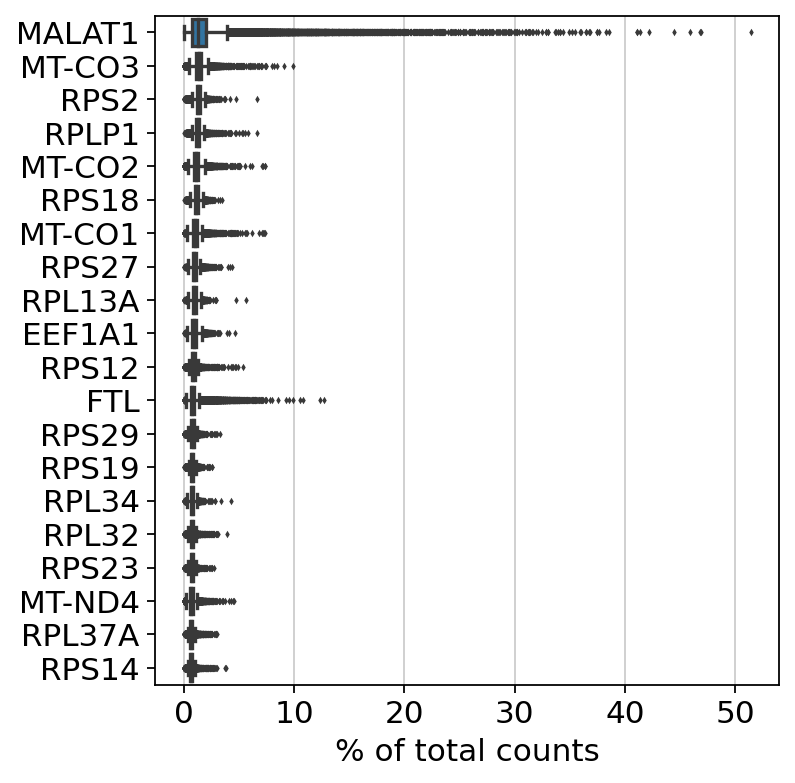

In [19]:
sc.pl.highest_expr_genes(GI_adata, n_top = 20)


In [20]:
sc.pp.filter_cells(GI_adata, min_genes = 200)
sc.pp.filter_genes(GI_adata, min_cells = 3)

filtered out 11081 genes that are detected in less than 3 cells


In [20]:
GI_adata.X.shape

(111668, 22613)

In [21]:
GI_adata.X.min(), GI_adata.X.max()

(0.0, 3718.0)

# Filter based on Mitochondrial Genes¶


In [21]:
mito_genes = GI_adata.var_names.str.startswith('MT-')

In [22]:
GI_adata.obs['percent_mito'] = np.sum(
    GI_adata[:, mito_genes].X, axis=1).A1 / np.sum(GI_adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
GI_adata.obs['n_counts'] = GI_adata.X.sum(axis=1).A1

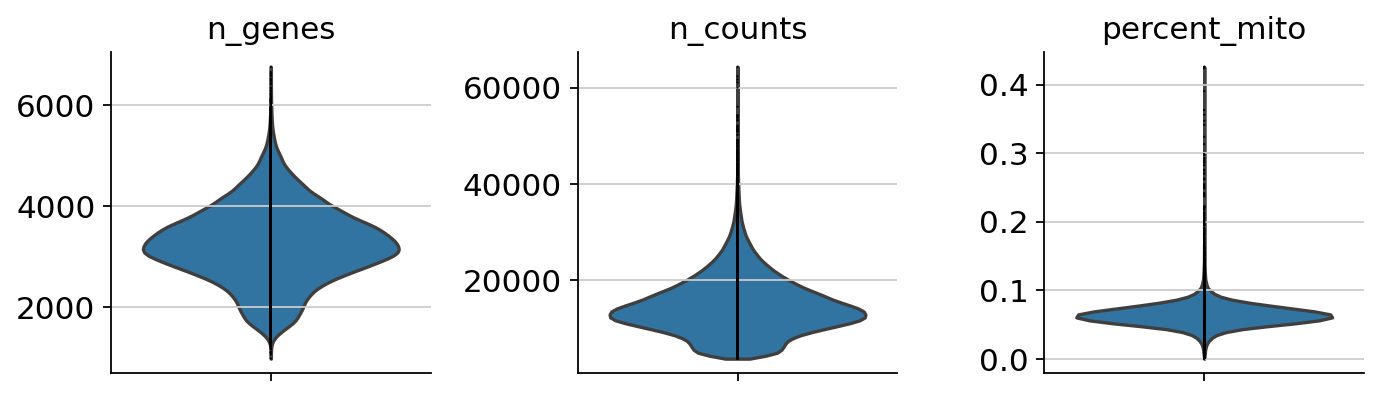

In [23]:
sc.pl.violin(GI_adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

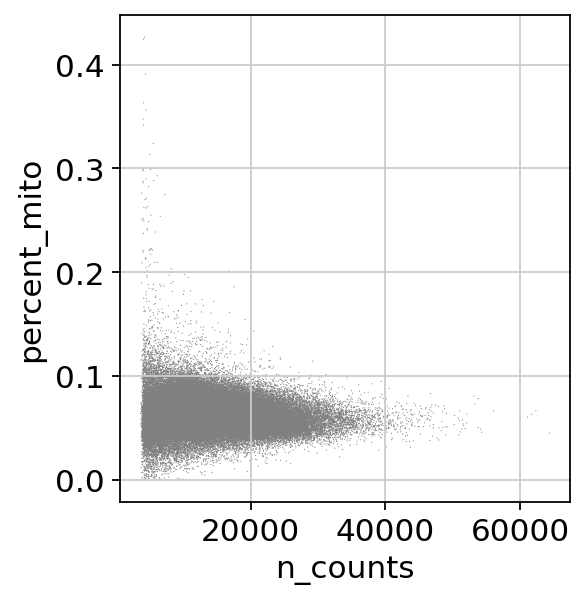

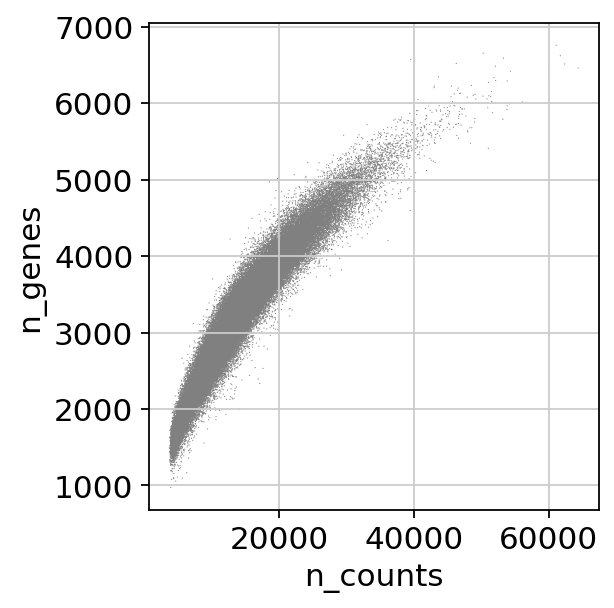

In [24]:
sc.pl.scatter(GI_adata, x='n_counts', y='percent_mito')
sc.pl.scatter(GI_adata, x='n_counts', y='n_genes')

In [25]:
GI_adata = GI_adata[GI_adata.obs['n_genes'] < 6000, :]
GI_adata = GI_adata[GI_adata.obs['percent_mito'] < 0.1, :]

# Genes related to perturbations


In [26]:
GI_adata.var.shape

(22613, 2)

In [27]:

gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []

for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])
        

In [28]:
print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [29]:
pd.DataFrame(perturb_listlower).iloc[index_raw_no, :]

,0
8,c19orf26
9,c3orf72
52,kiaa1804
70,negctrl0
71,negctrl1
72,negctrl10
73,negctrl11


In [30]:
gene_per_yes_unique = np.unique(gene_per_yes)

In [31]:
GI_adataCount = GI_adata.copy()

In [32]:
GI_adataCount.write('GI_raw_BeforeNormalize.h5ad')

# Normalize counts to 1 million reads & Logarithmize

In [1]:
import scanpy as sc
GI_adata = sc.read('GI_raw_BeforeNormalize.h5ad')

In [2]:
GI_adata.var.head()

,gene_ids,n_cells
RP11-34P13.3,ENSG00000243485,29
RP11-34P13.7,ENSG00000238009,266
RP11-34P13.8,ENSG00000239945,10
FO538757.3,ENSG00000279928,12
FO538757.2,ENSG00000279457,52365


In [3]:
sc.pp.normalize_per_cell(GI_adata, counts_per_cell_after=1e6)


In [4]:
sc.pp.log1p(GI_adata)

In [5]:
GI_adata.raw = GI_adata


# Filter for highly-variable genes

In [6]:
sc.pp.highly_variable_genes(GI_adata, min_mean=0.0125, max_mean=5, min_disp=0.5)


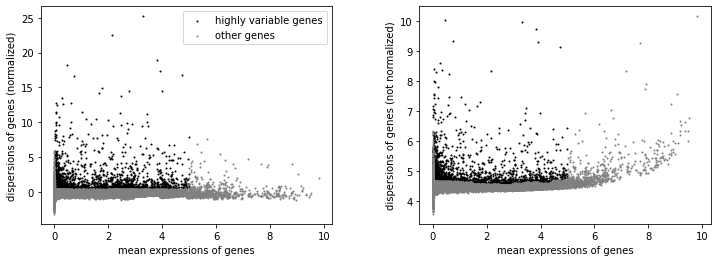

In [7]:
sc.pl.highly_variable_genes(GI_adata)


In [7]:
import numpy as np
highvar_gene = np.where(GI_adata.var['highly_variable'])[0]

In [8]:
GI_adata.var.head()

,gene_ids,n_cells,highly_variable,means,dispersions,dispersions_norm
RP11-34P13.3,ENSG00000243485,29,False,0.018382,4.527545,0.006333
RP11-34P13.7,ENSG00000238009,266,False,0.162959,4.537323,0.038436
RP11-34P13.8,ENSG00000239945,10,False,0.007555,4.902082,1.236049
FO538757.3,ENSG00000279928,12,False,0.008028,4.345793,-0.590414
FO538757.2,ENSG00000279457,52365,False,3.890862,4.533316,0.074785


In [8]:
highvar_gene.shape

(2230,)

In [9]:
highvar_gene

array([   16,    17,    23, ..., 22571, 22572, 22587])

In [10]:
np.save('highly_variableIndex.npy', highvar_gene)

In [14]:
import numpy as np
ListUSE = []
for i in range(k562_tfs_7_cell.shape[0]):
    listPer_i = k562_tfs_7_cell['guide_identity'][i].split('__')[0].split('_')
    ListUSE.append(listPer_i[0]); ListUSE.append(listPer_i[0]) 
perturb_list = np.unique(ListUSE)

perturb_listlower = [i.lower() for i in perturb_list]

In [15]:
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []

for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])
        

In [16]:
print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [17]:
# no genes found
pd.DataFrame(perturb_listlower).iloc[index_raw_no, :]

,0
8,c19orf26
9,c3orf72
52,kiaa1804
70,negctrl0
71,negctrl1
72,negctrl10
73,negctrl11


In [18]:
gene_per_yes_unique = np.unique(gene_per_yes)
gene_per_yes_unique.shape

(101,)

In [19]:
kept_gene = np.union1d( highvar_gene , gene_per_yes_unique)

In [20]:
kept_gene.shape

(2279,)

In [21]:
GI_adata = GI_adata[:, kept_gene]


In [22]:
np.save('kept_geneIndex.npy', kept_gene)

In [23]:
GI_adata.shape

(109950, 2279)

In [3]:
import scanpy as sc
GI_BN_adata = sc.read('GI_raw_BeforeNormalize.h5ad')

AttributeError: 'dict' object has no attribute 'dtype'

In [2]:
import numpy as np
kept_gene = np.load('kept_geneIndex.npy')

In [3]:
GI_BN_adata.raw = GI_BN_adata

In [4]:
GI_BN_adata = GI_BN_adata[:, kept_gene]


In [5]:
results_file = './GI_processed_KeptPerturb_RAW_adata.h5ad'
#np.save('./GI_processed_KeptPerturb_RAW_X.npy', GI_BN_adata.X)
GI_BN_adata.write(results_file)

# scVI implementation

In [3]:
#import scvi
import scanpy as sc

In [4]:
adata = sc.read('./GI_processed_KeptPerturb_RAW_adata.h5ad')

In [16]:
from anndata import AnnData
GI_adata = AnnData(X = adata.X, var = adata.var, obs = adata.obs)

In [ ]:
import numpy as np
np.save('/GI_processed_KeptPerturb_RAW_adataDenseMatrix.npy', adata.X)

In [10]:
adataX = adata.X.todense()

In [16]:
import scipy
scipy.sparse.save_npz('./GI_processed_KeptPerturb_RAW_adataCSRMatrix.npz', adata.X)

In [17]:
adata.obs.to_csv('./GI_processed_KeptPerturb_RAW_adataOBS.csv')

,n_genes,percent_mito,n_counts
cell_ids,,,
AAACCTGAGAAGAAGC-1,4108,0.068356,19413.0
AAACCTGAGGCATGTG-1,3142,0.071397,13474.0
AAACCTGAGGCCCTTG-1,4229,0.066644,23228.0
AAACCTGCACGAAGCA-1,2114,0.076440,6842.0
AAACCTGCAGACGTAG-1,2753,0.097809,9130.0
...,...,...,...
TTTGTCATCAGTACGT-8,3305,0.060976,14727.0
TTTGTCATCCACTCCA-8,2842,0.058051,9750.0
TTTGTCATCCCAACGG-8,2824,0.056517,8670.0


In [3]:
import scvi
import scanpy as sc

In [2]:
import scipy
adataX = scipy.sparse.load_npz('./GI_processed_KeptPerturb_RAW_adataCSRMatrix.npz')


In [3]:
import pandas as pd
dataOBS = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataOBS.csv')
dataVAR = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataVAR.csv')

In [4]:
dataOBSU = dataOBS.set_index('cell_ids')

In [5]:
dataVARU = dataVAR.set_index('Unnamed: 0')

In [6]:
from anndata import AnnData
GI_adata = AnnData(X = adataX, var = dataVARU, obs = dataOBSU )

In [13]:
GI_adata.write('./GI_processed_KeptPerturb_RAW_adataPyThon37.h5ad')

In [7]:
print(scvi.__version__)

0.7.1


In [1]:
import scvi
import scanpy as sc

ModuleNotFoundError: No module named 'scanpy'

In [ ]:
GI_adata.write('./GI_processed_KeptPerturb_RAW_adataPyThon37.h5ad')

In [ ]:
GI_adata = sc.read('./GI_processed_KeptPerturb_RAW_adataPyThon37.h5ad')

In [5]:
GI_adata = adata

In [6]:
GI_adata.shape

(109950, 2279)

In [11]:
GI_adata.layers

Layers with keys: 

In [12]:
scvi.data.setup_anndata(GI_adata)


INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 109950 cells, 2279 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [13]:
model = scvi.model.SCVI(GI_adata)

/home/hengshi/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [14]:
model


In [15]:
model.train(n_epochs = 1)

INFO     Training for 1 epochs                                                               
INFO     KL warmup phase exceeds overall training phaseIf your applications rely on the      
         posterior quality, consider training for more epochs or reducing the kl warmup.     
INFO     KL warmup for 400 epochs                                                            
Training...: 100%|██████████| 1/1 [00:58<00:00, 58.35s/it]
INFO     Training is still in warming up phase. If your applications rely on the posterior   
         quality, consider training for more epochs or reducing the kl warmup.               
INFO     Training time:  58 s. / 1 epochs                                                    


In [16]:
latent = model.get_latent_representation()

In [22]:
latent

array([[-5.7481213 , -3.0432866 ,  2.4143596 , ...,  0.16689283,
         0.9434895 , -1.0635362 ],
       [-1.463769  , -2.1943603 ,  2.6236637 , ..., -1.4997671 ,
         1.5111846 , -0.62083197],
       [-1.078755  ,  2.2505357 ,  1.685823  , ..., -0.6681639 ,
        -0.23385191, -2.5164688 ],
       ...,
       [-1.4166349 ,  3.492623  ,  0.19697188, ...,  0.5591795 ,
         1.3711793 , -5.756449  ],
       [-2.2643244 ,  1.6578486 ,  1.8473601 , ..., -0.6308019 ,
         0.42790055, -1.3638839 ],
       [-0.1538725 , -1.7604188 ,  2.8781028 , ...,  1.1287225 ,
         2.3545341 , -3.6350946 ]], dtype=float32)

In [19]:
scale = model.get_latent_library_size()

In [23]:
latent = model.get_latent_representation()

In [24]:
latent

array([[-5.7481213 , -3.0432866 ,  2.4143596 , ...,  0.16689283,
         0.9434895 , -1.0635362 ],
       [-1.463769  , -2.1943603 ,  2.6236637 , ..., -1.4997671 ,
         1.5111846 , -0.62083197],
       [-1.078755  ,  2.2505357 ,  1.685823  , ..., -0.6681639 ,
        -0.23385191, -2.5164688 ],
       ...,
       [-1.4166349 ,  3.492623  ,  0.19697188, ...,  0.5591795 ,
         1.3711793 , -5.756449  ],
       [-2.2643244 ,  1.6578486 ,  1.8473601 , ..., -0.6308019 ,
         0.42790055, -1.3638839 ],
       [-0.1538725 , -1.7604188 ,  2.8781028 , ...,  1.1287225 ,
         2.3545341 , -3.6350946 ]], dtype=float32)

# Revised perturbation library

In [1]:
from scipy import io
import pandas as pd
k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')

In [17]:
from scipy import sparse
adataX = sparse.load_npz('./GI_processed_KeptPerturb_RAW_adataCSRMatrix.npz')

import pandas as pd
dataOBS = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataOBS.csv')
dataVAR = pd.read_csv('./GI_processed_KeptPerturb_RAW_adataVAR.csv')

dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

from anndata import AnnData
GI_adata = AnnData(X = adataX, var = dataVARU, obs = dataOBSU )

In [19]:
GI_adata_1.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# perturbation Library

In [9]:
pd_cells = pd.DataFrame(GI_adata.obs.index)
pd_cells.head()

,cell_ids
0,AAACCTGAGAAGAAGC-1
1,AAACCTGAGGCATGTG-1
2,AAACCTGAGGCCCTTG-1
3,AAACCTGCACGAAGCA-1
4,AAACCTGCAGACGTAG-1


In [10]:
pd_kept_cells = pd.merge(pd_cells, k562_tfs_7_cell, left_on = 'cell_ids', right_on = 'cell_barcode', 
                        how = 'left')

In [11]:
print(pd_kept_cells.shape); print(pd_cells.shape)

(109950, 9)
(109950, 1)


In [12]:
pd_kept_cells['cell_barcode'].isnull().sum()

212

In [13]:
GI_adata_kept = GI_adata[~pd_kept_cells['cell_barcode'].isnull(), :]

In [14]:
GI_adata_kept.shape

(109738, 2279)

In [15]:
pd_kept_cells_kept = pd_kept_cells[~pd_kept_cells['cell_barcode'].isnull()]

In [16]:
GI_adata_kept.write('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataPyThon37.h5ad')
pd_kept_cells_kept.to_csv('./cell_meta_KeptPerturb_RAW_LibraryCheck_adataPyThon37.csv')

In [19]:
from scipy import sparse
sparse.save_npz('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataCSRMatrix.npz', GI_adata_kept.X)
GI_adata_kept.var.to_csv('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv')
GI_adata_kept.obs.to_csv('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv')

In [52]:
# quick test
adataX = sparse.load_npz('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataCSRMatrix.npz')
dataOBS = pd.read_csv('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv')
dataVAR = pd.read_csv('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv')

dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

GI_adata = AnnData(X = adataX, var = dataVARU, obs = dataOBSU )

In [54]:
dataVARU.head()

,gene_ids,n_cells
Unnamed: 0,,
RP11-54O7.3,ENSG00000223764,937
SAMD11,ENSG00000187634,2211
HES4,ENSG00000188290,31601
ISG15,ENSG00000187608,47896
RNF223,ENSG00000237330,208


In [56]:
import scvi
scvi.data.setup_anndata(GI_adata)
model = scvi.model.SCVI(GI_adata)
model.train(n_epochs = 1)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 109738 cells, 2279 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          
INFO     Training for 1 epochs                                                               
INFO     KL warmup phase exceeds overall training phaseIf your applications rely on the      
         posterior quality, consider training for more epoch

/home/hengshi/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Training...: 100%|██████████| 1/1 [01:50<00:00, 110.71s/it]
INFO     Training is still in warming up phase. If your applications rely on the posterior   
         quality, consider training for more epochs or reducing the kl warmup.               
INFO     Training time:  110 s. / 1 epochs                                                   


In [57]:
model.save("./models/")


In [62]:
posteriorZmean = model.get_latent_representation(give_mean = True)

In [61]:
posteriorZsample = model.get_latent_representation(give_mean = False)
posteriorsampl

array([[-3.6823947 , -0.6514495 ,  1.1531211 , ...,  0.6873652 ,
        -0.32439476, -0.7860332 ],
       [-2.0823631 , -0.4959235 ,  2.1024578 , ..., -1.5775876 ,
         1.3225226 , -0.66519904],
       [-2.5642538 ,  4.0318832 ,  2.4793499 , ..., -1.9798751 ,
        -1.0955156 , -2.189899  ],
       ...,
       [-0.03797752,  3.5934339 ,  0.8030397 , ...,  0.34739017,
         1.7796617 , -5.6557746 ],
       [-4.0185657 ,  4.0025086 ,  2.3705597 , ..., -2.0025961 ,
         0.21238779, -1.0570042 ],
       [ 0.5330068 , -0.9899688 ,  3.0491288 , ...,  0.6512321 ,
         1.3520076 , -3.190347  ]], dtype=float32)

In [63]:
posteriorLmean = model.get_latent_library_size(give_mean = True)
posteriorLSample = model.get_latent_library_size(give_mean = False)

In [67]:
posteriorLSample

array([[6.693097 ],
       [5.901997 ],
       [7.1560225],
       ...,
       [5.9018126],
       [8.0141   ],
       [6.5320215]], dtype=float32)

In [68]:
np.log(posteriorLmean)

array([[6.75136  ],
       [5.9892206],
       [7.1591787],
       ...,
       [5.808878 ],
       [8.047628 ],
       [6.402652 ]], dtype=float32)

In [32]:
import numpy as np
pd_kept_cells_kept.index = list(range(pd_kept_cells_kept.shape[0]))
ListUSE = []
for i in range(pd_kept_cells_kept.shape[0]):
    listPer_i = pd_kept_cells_kept['guide_identity'][i].split('__')[0].upper()
    ListUSE.append(listPer_i) 
perturb_list = np.unique(ListUSE)



In [47]:
obs1_list = []; obs2_list = []
for i in range(len(ListUSE)):
    obs1, obs2 = ListUSE[i].split("_")
    obs1_list.append(obs1); obs2_list.append(obs2)
obs1_np, obs2_np = np.array(obs1_list), np.array(obs2_list)

In [50]:
obs1_np

array(['NEGCTRL0', 'TSC22D1', 'KLF1', ..., 'BCORL1', 'ZBTB10', 'MAP4K3'],
      dtype='<U9')

In [49]:
look1 = np.unique(obs1_np).copy()
look1.sort()
look1

array(['AHR', 'ARID1A', 'ARRDC3', 'ATL1', 'BAK1', 'BCL2L11', 'BCORL1',
       'BPGM', 'C19ORF26', 'C3ORF72', 'CBFA2T3', 'CBL', 'CDKN1A',
       'CDKN1B', 'CDKN1C', 'CEBPA', 'CEBPB', 'CEBPE', 'CELF2', 'CITED1',
       'CKS1B', 'CLDN6', 'CNN1', 'CNNM4', 'COL1A1', 'COL2A1', 'CSRNP1',
       'DLX2', 'DUSP9', 'EGR1', 'ELMSAN1', 'ETS2', 'FEV', 'FOSB', 'FOXA1',
       'FOXA3', 'FOXF1', 'FOXL2', 'FOXO4', 'GLB1L2', 'HES7', 'HK2',
       'HNF4A', 'HOXA13', 'HOXB9', 'HOXC13', 'IER5L', 'IGDCC3', 'IKZF3',
       'IRF1', 'ISL2', 'JUN', 'KIAA1804', 'KIF18B', 'KIF2C', 'KLF1',
       'KMT2A', 'LHX1', 'LYL1', 'MAML2', 'MAP2K3', 'MAP2K6', 'MAP4K3',
       'MAP4K5', 'MAP7D1', 'MAPK1', 'MEIS1', 'MIDN', 'NCL', 'NEGCTRL0',
       'NEGCTRL1', 'NEGCTRL10', 'NEGCTRL11', 'NIT1', 'OSR2', 'PLK4',
       'POU3F2', 'PRDM1', 'PRTG', 'PTPN1', 'PTPN12', 'PTPN13', 'PTPN9',
       'RHOXF2', 'RREB1', 'RUNX1T1', 'S1PR2', 'SAMD1', 'SET', 'SGK1',
       'SLC4A1', 'SLC6A9', 'SNAI1', 'SPI1', 'STIL', 'TBX2', 'TBX3',
       'TGF

In [51]:
look2 = np.unique(obs2_np).copy()
look2.sort()
look2

array(['BAK1', 'C19ORF26', 'CBFA2T3', 'CDKN1A', 'CDKN1B', 'CEBPA',
       'CEBPB', 'CEBPE', 'CLDN6', 'CNN1', 'COL2A1', 'DLX2', 'ELMSAN1',
       'ETS2', 'FEV', 'FOXA1', 'FOXF1', 'FOXL2', 'HOXB9', 'HOXC13',
       'IER5L', 'IGDCC3', 'IKZF3', 'ISL2', 'KIF2C', 'KLF1', 'MAP2K6',
       'MAP7D1', 'MAPK1', 'MEIS1', 'NEGCTRL0', 'OSR2', 'PRTG', 'PTPN12',
       'PTPN9', 'RUNX1T1', 'S1PR2', 'SAMD1', 'SET', 'SLC38A2', 'SNAI1',
       'SPI1', 'STIL', 'TBX2', 'TBX3', 'TGFBR2', 'UBASH3A', 'UBASH3B',
       'ZBTB1', 'ZBTB25'], dtype='<U8')

In [77]:
min([len(look1[i]) for i in range(look2.shape[0])])

3

In [76]:
min([len(look2[i]) for i in range(look2.shape[0])])

3

In [79]:
for i in range(obs1_np.shape[0]):
    for j in range(obs2_np.shape[0]):
        obs1 = obs1_np[i]; obs2 = obs2_np[j]
        if i != j:
            if obs1[:3] != 'NEG':
                if  obs1 == obs2: 
                    if obs1_np[j] == obs2_np[i]:
                        print((i,j))

(16, 161)
(16, 299)
(16, 400)
(16, 413)
(16, 438)
(16, 543)
(16, 800)
(16, 853)
(16, 950)
(16, 1035)
(16, 1113)
(16, 1281)
(16, 1436)
(16, 1468)
(16, 1747)
(16, 1752)
(16, 1865)
(16, 1937)
(16, 2077)
(16, 2407)
(16, 2445)
(16, 2538)
(16, 2554)
(16, 2676)
(16, 2975)
(16, 2983)
(16, 3262)
(16, 3481)
(16, 3808)
(16, 3885)
(16, 3921)
(16, 4063)
(16, 4446)
(16, 4507)
(16, 4664)
(16, 4673)
(16, 4896)
(16, 4907)
(16, 5114)
(16, 5279)
(16, 5898)
(16, 5908)
(16, 6250)
(16, 6614)
(16, 6618)
(16, 6660)
(16, 7011)
(16, 7103)
(16, 7194)
(16, 7697)
(16, 7871)
(16, 8023)
(16, 8229)
(16, 8311)
(16, 8401)
(16, 9004)
(16, 9445)
(16, 9648)
(16, 9813)
(16, 9962)
(16, 10011)
(16, 10120)
(16, 10266)
(16, 10300)
(16, 10333)
(16, 10862)
(16, 10876)
(16, 10888)
(16, 11847)
(16, 11923)
(16, 11946)
(16, 12000)
(16, 12024)
(16, 12304)
(16, 12419)
(16, 12564)
(16, 12701)
(16, 12847)
(16, 12860)
(16, 13090)
(16, 13865)
(16, 13883)
(16, 13962)
(16, 14039)
(16, 14068)
(16, 14071)
(16, 14080)
(16, 14207)
(16, 14263)
(

(26, 43)
(26, 112)
(26, 120)
(26, 207)
(26, 269)
(26, 308)
(26, 359)
(26, 550)
(26, 588)
(26, 709)
(26, 730)
(26, 825)
(26, 943)
(26, 969)
(26, 1085)
(26, 1625)
(26, 1691)
(26, 1836)
(26, 1896)
(26, 1915)
(26, 2182)
(26, 2193)
(26, 2274)
(26, 2451)
(26, 2503)
(26, 2508)
(26, 2642)
(26, 2812)
(26, 3029)
(26, 3091)
(26, 3373)
(26, 3756)
(26, 3823)
(26, 3902)
(26, 3912)
(26, 4087)
(26, 4155)
(26, 4329)
(26, 4382)
(26, 4427)
(26, 4511)
(26, 4644)
(26, 4663)
(26, 4738)
(26, 4910)
(26, 5008)
(26, 5232)
(26, 5554)
(26, 5602)
(26, 5659)
(26, 5679)
(26, 5690)
(26, 5909)
(26, 5948)
(26, 6267)
(26, 6486)
(26, 6522)
(26, 7223)
(26, 7281)
(26, 7343)
(26, 7605)
(26, 7816)
(26, 8061)
(26, 8254)
(26, 8358)
(26, 8393)
(26, 8573)
(26, 8601)
(26, 8661)
(26, 8728)
(26, 8807)
(26, 9057)
(26, 9250)
(26, 9357)
(26, 9392)
(26, 9515)
(26, 9741)
(26, 9796)
(26, 9843)
(26, 9996)
(26, 10019)
(26, 10097)
(26, 10108)
(26, 10279)
(26, 10375)
(26, 10645)
(26, 10725)
(26, 10996)
(26, 11135)
(26, 11249)
(26, 11535)
(26

(26, 101844)
(26, 101848)
(26, 102251)
(26, 102560)
(26, 102663)
(26, 102696)
(26, 102811)
(26, 103019)
(26, 103117)
(26, 103152)
(26, 103309)
(26, 103562)
(26, 103727)
(26, 103953)
(26, 104053)
(26, 104074)
(26, 104075)
(26, 104446)
(26, 104622)
(26, 104903)
(26, 104932)
(26, 104990)
(26, 105142)
(26, 105374)
(26, 105513)
(26, 105711)
(26, 105898)
(26, 105969)
(26, 106170)
(26, 106351)
(26, 106380)
(26, 106412)
(26, 106712)
(26, 107246)
(26, 107782)
(26, 107824)
(26, 107867)
(26, 107926)
(26, 107968)
(26, 108746)
(26, 109128)
(26, 109201)
(26, 109311)
(26, 109333)
(26, 109557)
(26, 109570)
(28, 43)
(28, 112)
(28, 120)
(28, 207)
(28, 269)
(28, 308)
(28, 359)
(28, 550)
(28, 588)
(28, 709)
(28, 730)
(28, 825)
(28, 943)
(28, 969)
(28, 1085)
(28, 1625)
(28, 1691)
(28, 1836)
(28, 1896)
(28, 1915)
(28, 2182)
(28, 2193)
(28, 2274)
(28, 2451)
(28, 2503)
(28, 2508)
(28, 2642)
(28, 2812)
(28, 3029)
(28, 3091)
(28, 3373)
(28, 3756)
(28, 3823)
(28, 3902)
(28, 3912)
(28, 4087)
(28, 4155)
(28, 4329)

(30, 690)
(30, 986)
(30, 1279)
(30, 1910)
(30, 2092)
(30, 2144)
(30, 2213)
(30, 2235)
(30, 2236)
(30, 2365)
(30, 2524)
(30, 2536)
(30, 2704)
(30, 2806)
(30, 3007)
(30, 3049)
(30, 3247)
(30, 3263)
(30, 3296)
(30, 3781)
(30, 3811)
(30, 3835)
(30, 4243)
(30, 4800)
(30, 4976)
(30, 5016)
(30, 5276)
(30, 5277)
(30, 5746)
(30, 5755)
(30, 5976)
(30, 6091)
(30, 6534)
(30, 6948)
(30, 7163)
(30, 7482)
(30, 7674)
(30, 7726)
(30, 7793)
(30, 7866)
(30, 8339)
(30, 8374)
(30, 8382)
(30, 8400)
(30, 8552)
(30, 8602)
(30, 8646)
(30, 8698)
(30, 8740)
(30, 8815)
(30, 9074)
(30, 9143)
(30, 9211)
(30, 9330)
(30, 9431)
(30, 9519)
(30, 9605)
(30, 9864)
(30, 10169)
(30, 10187)
(30, 10383)
(30, 10519)
(30, 10602)
(30, 10776)
(30, 10810)
(30, 10944)
(30, 11014)
(30, 11093)
(30, 11514)
(30, 11580)
(30, 12063)
(30, 12280)
(30, 12565)
(30, 12588)
(30, 12606)
(30, 12700)
(30, 12742)
(30, 12853)
(30, 12874)
(30, 13061)
(30, 13133)
(30, 13234)
(30, 13377)
(30, 13651)
(30, 13710)
(30, 13880)
(30, 13913)
(30, 14141)
(30,

(31, 106399)
(31, 106443)
(31, 106751)
(31, 106869)
(31, 107115)
(31, 107601)
(31, 107683)
(31, 107746)
(31, 107817)
(31, 107818)
(31, 108368)
(31, 108441)
(31, 108579)
(31, 108652)
(31, 108728)
(31, 108844)
(31, 109051)
(31, 109074)
(31, 109239)
(39, 230)
(39, 549)
(39, 721)
(39, 1287)
(39, 1346)
(39, 1644)
(39, 2190)
(39, 2566)
(39, 2714)
(39, 2817)
(39, 2946)
(39, 3565)
(39, 3597)
(39, 3729)
(39, 3893)
(39, 4572)
(39, 4766)
(39, 5212)
(39, 5298)
(39, 5817)
(39, 6241)
(39, 6253)
(39, 6548)
(39, 6581)
(39, 6645)
(39, 6659)
(39, 6790)
(39, 6823)
(39, 7016)
(39, 8099)
(39, 8557)
(39, 9121)
(39, 9848)
(39, 9860)
(39, 9948)
(39, 10269)
(39, 10452)
(39, 10635)
(39, 10658)
(39, 10975)
(39, 11194)
(39, 11253)
(39, 11258)
(39, 11352)
(39, 11671)
(39, 12499)
(39, 12666)
(39, 12703)
(39, 12774)
(39, 13529)
(39, 13650)
(39, 13703)
(39, 13937)
(39, 13947)
(39, 14086)
(39, 14264)
(39, 14447)
(39, 14512)
(39, 14587)
(39, 15452)
(39, 15822)
(39, 15940)
(39, 16376)
(39, 16558)
(39, 16782)
(39, 16999)

(52, 103026)
(52, 103573)
(52, 103874)
(52, 104204)
(52, 104221)
(52, 104516)
(52, 104525)
(52, 104770)
(52, 104827)
(52, 104842)
(52, 104964)
(52, 104988)
(52, 105104)
(52, 105625)
(52, 105689)
(52, 105710)
(52, 105807)
(52, 105967)
(52, 106375)
(52, 106385)
(52, 106404)
(52, 106733)
(52, 106762)
(52, 106968)
(52, 106984)
(52, 107105)
(52, 107277)
(52, 107378)
(52, 107394)
(52, 107421)
(52, 107540)
(52, 108105)
(52, 108383)
(52, 108828)
(52, 109006)
(52, 109027)
(52, 109045)
(52, 109093)
(52, 109206)
(52, 109238)
(57, 217)
(57, 979)
(57, 1674)
(57, 1962)
(57, 2937)
(57, 3182)
(57, 3326)
(57, 4171)
(57, 4176)
(57, 4216)
(57, 4467)
(57, 4608)
(57, 5039)
(57, 5118)
(57, 5313)
(57, 5486)
(57, 5996)
(57, 6084)
(57, 8172)
(57, 8876)
(57, 9263)
(57, 9370)
(57, 9382)
(57, 9918)
(57, 9966)
(57, 10353)
(57, 10425)
(57, 10566)
(57, 10633)
(57, 10691)
(57, 11257)
(57, 11421)
(57, 11821)
(57, 12745)
(57, 12848)
(57, 13278)
(57, 13287)
(57, 13291)
(57, 13328)
(57, 13686)
(57, 13752)
(57, 13831)
(57

KeyboardInterrupt: 

In [85]:
np.save('cell_meta_KeptPerturb_RAW_LibraryCheck_PyThon37_drug1.npy', obs1_np)
np.save('cell_meta_KeptPerturb_RAW_LibraryCheck_PyThon37_drug2.npy', obs2_np)

In [80]:
obs1_np[16], obs2_np[27437]

('UBASH3B', 'UBASH3B')

In [81]:
obs1_np[27437], obs2_np[16]

('NEGCTRL0', 'NEGCTRL0')

# GI Normalized Data

In [1]:
import scanpy as sc
GI_adata = sc.read('GI_raw.h5ad')

import numpy as np
import pandas as pd

k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')


ListUSE = []
for i in range(k562_tfs_7_cell.shape[0]):
    listPer_i = k562_tfs_7_cell['guide_identity'][i].split('__')[0].split('_')
    ListUSE.append(listPer_i[0]); ListUSE.append(listPer_i[0]) 
perturb_list = np.unique(ListUSE)


perturb_listlower = [i.lower() for i in perturb_list]
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []
for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])

print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [7]:
gene_per_yes_unique = np.unique(gene_per_yes)
sc.settings.verbosity = 3
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 7.2.0
attr                19.3.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                2.10.0
idna                2.10
ipykernel           5.3.2
ipython_

normalizing counts per cell
    finished (0:00:04)


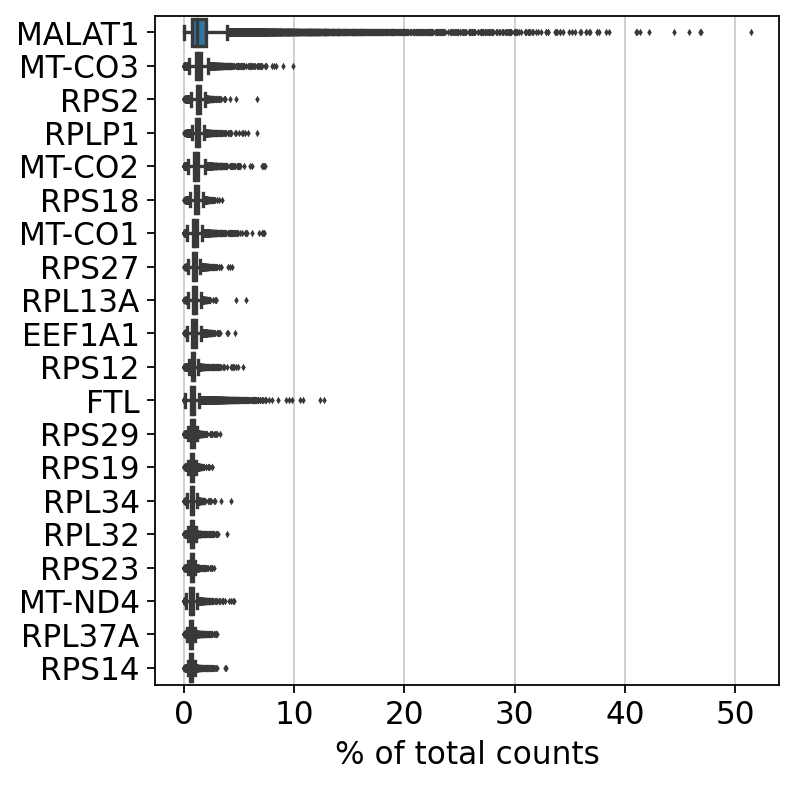

In [8]:
sc.settings.set_figure_params(dpi=80)
sc.pl.highest_expr_genes(GI_adata, n_top = 20)

In [9]:
sc.pp.filter_cells(GI_adata, min_genes = 200)
sc.pp.filter_genes(GI_adata, min_cells = 3)

In [10]:
GI_adata.X.shape

(111668, 22613)

In [11]:
GI_adata.X.min(), GI_adata.X.max()

(0.0, 3718.0)

In [12]:
mito_genes = GI_adata.var_names.str.startswith('MT-')
GI_adata.obs['percent_mito'] = np.sum(
    GI_adata[:, mito_genes].X, axis=1).A1 / np.sum(GI_adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
GI_adata.obs['n_counts'] = GI_adata.X.sum(axis=1).A1
(GI_adata.obs['n_genes'] < 6000).sum(), (GI_adata.obs['percent_mito'] < 0.1).sum()

(111627, 109991)

In [13]:
11081 + 22613

33694

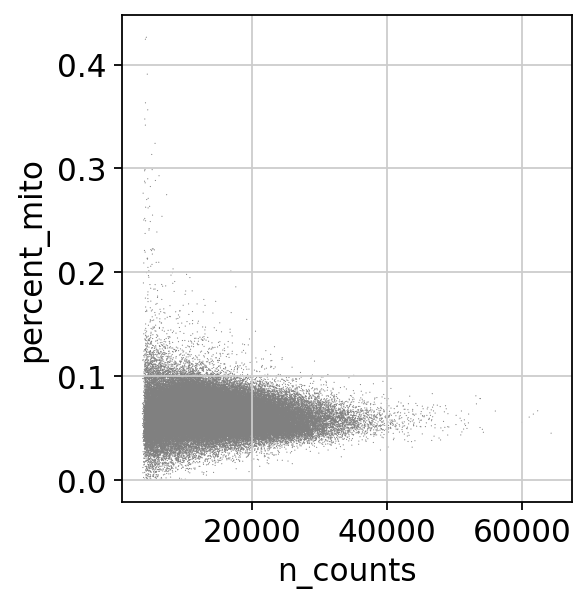

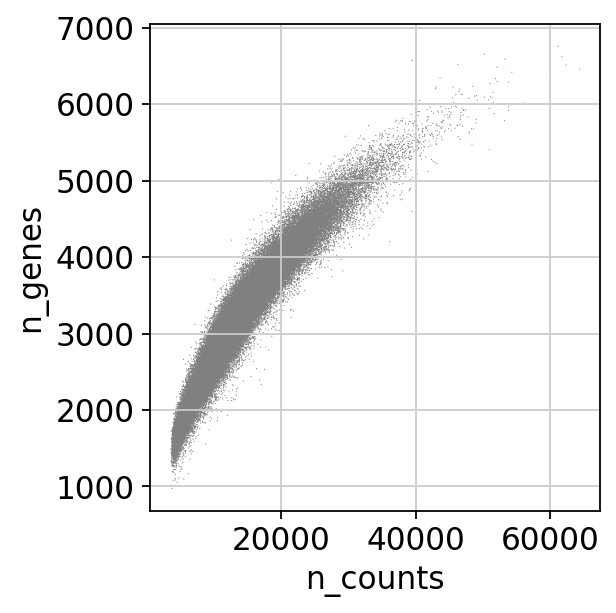

In [14]:
sc.pl.scatter(GI_adata, x='n_counts', y='percent_mito')
sc.pl.scatter(GI_adata, x='n_counts', y='n_genes')

In [15]:
GI_adata = GI_adata[GI_adata.obs['n_genes'] < 6000, :]
GI_adata = GI_adata[GI_adata.obs['percent_mito'] < 0.1, :]

In [16]:
GI_adata.shape

(109950, 22613)

In [17]:
# perturbations genes
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
gene_raw_set = set(gene_raw_list) 

index_raw_no = []
index_raw_yes = []
gene_per_yes = []

for i in range(len(perturb_listlower)):
    if perturb_listlower[i] not in gene_raw_set:
        index_raw_no.append(i)
        #gene_per_yes.append(None)
    else:
        index_raw_yes.append(i)
        gene_per_yes.append(np.where(np.array(gene_raw_list) == perturb_listlower[i])[0][0])
print(len(gene_per_yes)); print(len(perturb_listlower))

101
108


In [18]:
gene_per_yes_unique = np.unique(gene_per_yes)

In [29]:
GI_adata = sc.read('GI_raw_BeforeNormalize.h5ad')
GI_adata.shape

(109950, 22613)

In [30]:
GI_adata.X.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 4., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
GI_adata.layers["counts"] = GI_adata.X.copy()

In [32]:
GI_adata.layers[
    'counts'
].shape

(109950, 22613)

In [33]:
GI_adata.layers['counts'].sum(1)

matrix([[19413.],
        [13474.],
        [23228.],
        ...,
        [ 8670.],
        [29247.],
        [12514.]], dtype=float32)

In [34]:
sc.pp.normalize_total(GI_adata, target_sum = 1e4)

normalizing counts per cell
    finished (0:00:01)


In [35]:
GI_adata.layers['counts'].shape

(109950, 22613)

In [37]:
GI_adata.layers['counts'].sum(1)

matrix([[19413.],
        [13474.],
        [23228.],
        ...,
        [ 8670.],
        [29247.],
        [12514.]], dtype=float32)

In [38]:
GI_adata.X.sum(1)

matrix([[ 9999.999],
        [10000.001],
        [10000.   ],
        ...,
        [10000.   ],
        [10000.   ],
        [ 9999.999]], dtype=float32)

In [39]:
sc.pp.log1p(GI_adata)
GI_adata.raw = GI_adata

In [40]:
# previously filtered data
import os
from scipy import sparse
from anndata import AnnData

dataVAR = pd.read_csv( 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv')
dataOBS = pd.read_csv('GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv')

genesSelected = list(dataVAR['Unnamed: 0'])
genesWith = np.array(list(GI_adata.var.index))

indicesList = []
for i in range(len(genesSelected)):
    indice = np.where(genesWith  == genesSelected[i])[0][0]
    indicesList.append(indice)

len(indicesList), len(genesSelected)

GI_adata = GI_adata[:, indicesList]

GI_adata.shape

(109950, 2279)

In [41]:
genesWith 

array(['RP11-34P13.3', 'RP11-34P13.7', 'RP11-34P13.8', ..., 'AL354822.1',
       'AC004556.1', 'AC240274.1'], dtype='<U19')

In [42]:
cellsSelected = list(dataOBS['cell_ids'])
cellsWith = np.array(list(GI_adata.obs.index))

indicesCellList = []
for i in range(len(cellsSelected)):
    indiceCell = np.where(cellsWith  == cellsSelected[i])[0][0]
    indicesCellList.append(indiceCell)

len(indicesCellList), len(cellsSelected)

(109738, 109738)

In [43]:
GI_adata = GI_adata[indicesCellList, :]

In [44]:
GI_adata.shape

(109738, 2279)

In [45]:
GI_adata.layers[
    'counts'
].shape

(109738, 2279)

In [46]:
GI_adatacopy = GI_adata.copy()

In [47]:
sc.pp.scale(GI_adata, max_value=10)

/home/hengshi/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [49]:
GI_adata.write('GI_processed_KeptPerturb_RAW_LibraryCheck_processed.h5ad')

In [57]:
sc.pp.normalize_total(GI_adatacopy, target_sum = 1e4)

normalizing counts per cell
    finished (0:00:00)


In [50]:
GI_adata.layers['counts'].sum(1)

matrix([[ 798.],
        [ 418.],
        [ 649.],
        ...,
        [ 300.],
        [1052.],
        [ 339.]], dtype=float32)

In [53]:
pwd

'/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI'

In [60]:
GI_adatacopy.X.A.sum(1)

array([10000.   , 10000.   ,  9999.999, ..., 10000.002, 10000.   ,
       10000.   ], dtype=float32)

## the order of the two drugs does not matter

# Common genes with the DrugCell example

In [87]:
f = open('../k562/DrugCell/data/gene2ind.txt', 'r')
content = f.read()

geneList = []
contentRow = content.split('\n')
for i in range(len(contentRow)):
    valuei = contentRow[i]
    genei = valuei.split('\t')[1].lower()
    geneList.append(genei)

IndexError: list index out of range

In [89]:
gene_raw_list = [i.lower() for i in list(GI_adata.var.index)]
commonList = list(set(gene_raw_list).intersection(geneList))

In [90]:
print(len(commonList )); print(len(gene_raw_list)); print(len(geneList))

433
2279
3008


In [7]:
GI_adata = sc.read('./GI_processed_KeptPerturb_RAW_LibraryCheck_adataPyThon37.h5ad')
GI_adata.shape

(109738, 2279)

# Scaling each gene to unit variance¶


In [8]:
sc.pp.scale(GI_adata, max_value = 10)


In [21]:
import scanpy as sc
sc.pp.scale(GI_adata_kept, max_value = 10)

ModuleNotFoundError: No module named 'scanpy'

In [9]:
GI_adata.shape

(109738, 2279)

In [82]:
cell_meta = pd.read_csv('cell_meta.csv')

In [84]:
cell_meta.shape

(109738, 10)

# Saving Preprocessed Data¶


In [26]:
results_file = './GI_processed_adata.h5ad'
np.save('./GI_processed_X.npy', GI_adata.X)

In [27]:
GI_adata.write(results_file)

In [29]:
GI_adata.X.min(), GI_adata.X.max()

(-2.0222943, 10.0)

In [26]:
results_file = './GI_processed_KeptPerturb_adata.h5ad'
np.save('./GI_processed_KeptPerturb_X.npy', GI_adata.X)
GI_adata.write(results_file)

In [27]:
GI_adata.X.min(), GI_adata.X.max()

(-12.87777, 10.0)

In [10]:
results_file = './GI_processed_KeptPerturb_LibraryCheck_adataPyThon37.h5ad'
GI_adata.write(results_file)

In [12]:
import numpy as np
np.save('./GI_processed_KeptPerturb_X_LibraryCheck_adataPyThon37.npy', GI_adata.X)

In [13]:
adataX = GI_adata.X
adataX

array([[-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565],
       [-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565],
       [-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565],
       ...,
       [-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565],
       [-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565],
       [-0.08974519, -0.13104433, -0.52386576, ..., -0.01030185,
        -0.0175805 , -0.01129565]], dtype=float32)

# UMAP visualization

In [14]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50, random_state = 42)

In [16]:
pca50_result = pca_50.fit_transform(adataX)
import umap
umapPCA = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(pca50_result)

/home/hengshi/.local/lib/python3.6/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengshi/.local/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/hengshi/.local/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../../home/hengsh

In [17]:
obs_meta_pd = pd.read_csv('cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv')

In [19]:
from plotnine import * 
df_tsne_pr = pd.DataFrame(umapPCA.copy())
df_tsne_pr['x-umap'] = umapPCA[:,0]
df_tsne_pr['y-umap'] = umapPCA[:,1]
df_tsne_pr['Perturbation'] = obs_meta_pd['perturbation']
df_tsne_pr['Cluster'] = obs_meta_pd['Cluster']
df_tsne_pr['Group'] = obs_meta_pd['Group']



chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Group') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_data_Group.png"
figure_path_pr = "./" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Cluster') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_data_Cluster.png"
figure_path_pr = "./" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Perturbation') ) \
+ geom_point(size=0.5, alpha = 0.5) \
+ ggtitle("UMAP dimensions")
figure_name_pr = "UMAP_data_Perturbation.png"
figure_path_pr = "./" + figure_name_pr
chart_pr.save(figure_path_pr, width=12, height=8, dpi=144)

/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 12 x 8 in image.
  from_inches(height, units), units))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ./UMAP_data_Group.png
  warn('Filename: {}'.format(filename))
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/home/hengshi/.local/lib/python3.6/site-packages/plotnine/ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotl

In [ ]:
trans = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit(pca_result_50_real)

In [30]:
k562_tfs_7_cell = pd.read_csv('./GSE133344_filtered_cell_identities.csv.gz')

In [31]:
k562_tfs_7_cell.head()

,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,TTGAACGAGACTCGGA-2,ARID1A_NegCtrl0__ARID1A_NegCtrl0,28684,1809,15.856274,2,True,1
1,CGTTGGGGTGTTTGTG-7,BCORL1_NegCtrl0__BCORL1_NegCtrl0,18367,896,20.498884,7,True,1
2,GAACCTAAGTGTTAGA-6,FOSB_NegCtrl0__FOSB_NegCtrl0,16296,664,24.542169,6,True,1
3,CCTTCCCTCCGTCATC-4,SET_KLF1__SET_KLF1,16262,850,19.131765,4,True,1
4,TCAATCTGTCTTTCAT-2,OSR2_NegCtrl0__OSR2_NegCtrl0,16057,1067,15.048735,2,True,2


In [33]:
k562_tfs_7_cell['guide_identity'].unique().shape

(290,)

# Perturbation Frequency


In [37]:
pd_cells = pd.DataFrame(GI_adata.obs.index)

In [38]:
pd_cells.head()

,cell_ids
0,AAACCTGAGAAGAAGC-1
1,AAACCTGAGGCATGTG-1
2,AAACCTGAGGCCCTTG-1
3,AAACCTGCACGAAGCA-1
4,AAACCTGCAGACGTAG-1


In [39]:
pd_kept_cells = pd.merge(pd_cells, k562_tfs_7_cell, left_on = 'cell_ids', right_on = 'cell_barcode', 
                        how = 'left')

In [40]:
pd_kept_cells.head()

,cell_ids,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252.0,67.0,18.686567,1.0,True,2.0
1,AAACCTGAGGCATGTG-1,AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151.0,104.0,20.682692,1.0,True,1.0
2,AAACCTGAGGCCCTTG-1,AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037.0,59.0,17.576271,1.0,True,1.0
3,AAACCTGCACGAAGCA-1,AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958.0,39.0,24.564103,1.0,True,1.0
4,AAACCTGCAGACGTAG-1,AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244.0,14.0,17.428571,1.0,True,1.0


In [42]:
pd_kept_cells['cell_barcode'].isnull().sum()

212

In [43]:
pd_kept_cells[pd_kept_cells['cell_barcode'].isnull()]

,cell_ids,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
34,AAACGGGCAAATCCGT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,AACCATGTCCATGAGT-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,AACTCCCCATTCGACA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,AATCCAGCACCTCGGA-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,ACGATACGTCCGTGAC-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
107121,TACGGTAGTGGCAAAC-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107470,TATCTCATCGTTGCCT-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109032,TGGGAAGCAGGGATTG-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109542,TTCTCAATCGAATGGG-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
(k562_tfs_7_cell['cell_barcode'] == 'AAACGGGCAAATCCGT-1').sum()

0

In [52]:
(k562_tfs_7_cellnames.iloc[:, 0]== 'AAACGGGCAAATCCGT-1').sum()

1

In [55]:
k562_tfs_7_cell.head()


,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,TTGAACGAGACTCGGA-2,ARID1A_NegCtrl0__ARID1A_NegCtrl0,28684,1809,15.856274,2,True,1
1,CGTTGGGGTGTTTGTG-7,BCORL1_NegCtrl0__BCORL1_NegCtrl0,18367,896,20.498884,7,True,1
2,GAACCTAAGTGTTAGA-6,FOSB_NegCtrl0__FOSB_NegCtrl0,16296,664,24.542169,6,True,1
3,CCTTCCCTCCGTCATC-4,SET_KLF1__SET_KLF1,16262,850,19.131765,4,True,1
4,TCAATCTGTCTTTCAT-2,OSR2_NegCtrl0__OSR2_NegCtrl0,16057,1067,15.048735,2,True,2


In [58]:
(k562_tfs_7_cell.iloc[:, 0] == 'AAACGGGCAAATCCGT-1').sum()

0

In [57]:
pd_kept_cells.shape

(109950, 9)

In [59]:
pd_kept_cells['cell_barcode'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
109945    False
109946    False
109947    False
109948    False
109949    False
Name: cell_barcode, Length: 109950, dtype: bool

In [60]:
pd_kept_cells['cell_barcode'].shape

(109950,)

In [62]:
(1 - pd_kept_cells['cell_barcode'].isnull()).sum()

109738

In [67]:
~pd_kept_cells['cell_barcode'].isnull()

0         True
1         True
2         True
3         True
4         True
          ... 
109945    True
109946    True
109947    True
109948    True
109949    True
Name: cell_barcode, Length: 109950, dtype: bool

In [63]:
GI_adata.shape

(109950, 2230)

In [68]:
GI_adata_kept = GI_adata[~pd_kept_cells['cell_barcode'].isnull(), :]

In [69]:
GI_adata_kept.shape

(109738, 2230)

In [70]:
results_file = './GI_processed_kept_adata.h5ad'
np.save('./GI_processed_kept_X.npy', GI_adata_kept.X)

In [71]:
GI_adata_kept.write(results_file)

In [94]:
pd_kept_cells['cell_ids'].isnull().sum()

0

In [73]:
pd_kept_cells_kept = pd_kept_cells[~pd_kept_cells['cell_barcode'].isnull()]

In [74]:
pd_kept_cells_kept.head()

,cell_ids,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252.0,67.0,18.686567,1.0,True,2.0
1,AAACCTGAGGCATGTG-1,AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151.0,104.0,20.682692,1.0,True,1.0
2,AAACCTGAGGCCCTTG-1,AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037.0,59.0,17.576271,1.0,True,1.0
3,AAACCTGCACGAAGCA-1,AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958.0,39.0,24.564103,1.0,True,1.0
4,AAACCTGCAGACGTAG-1,AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244.0,14.0,17.428571,1.0,True,1.0


In [75]:
pd_kept_cells_kept.shape

(109738, 9)

In [76]:
pd_kept_cells_kept.to_csv('cell_meta.csv')

In [78]:
pd_kept_perturb = pd_kept_cells_kept['guide_identity'].value_counts()

In [79]:
pdpd_kept_perturb = pd.DataFrame(pd_kept_perturb)

In [80]:
pdpd_kept_perturb.head()

,guide_identity
NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,3494
NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0,2922
NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0,2806
NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,2504
CEBPE_RUNX1T1__CEBPE_RUNX1T1,1198


In [82]:
pdpd_kept_perturb['Perturbations'] = pdpd_kept_perturb.index
pdpd_kept_perturb.head()

,guide_identity,Perturbations
NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,3494,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0
NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0,2922,NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0
NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0,2806,NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0
NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,2504,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0
CEBPE_RUNX1T1__CEBPE_RUNX1T1,1198,CEBPE_RUNX1T1__CEBPE_RUNX1T1


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

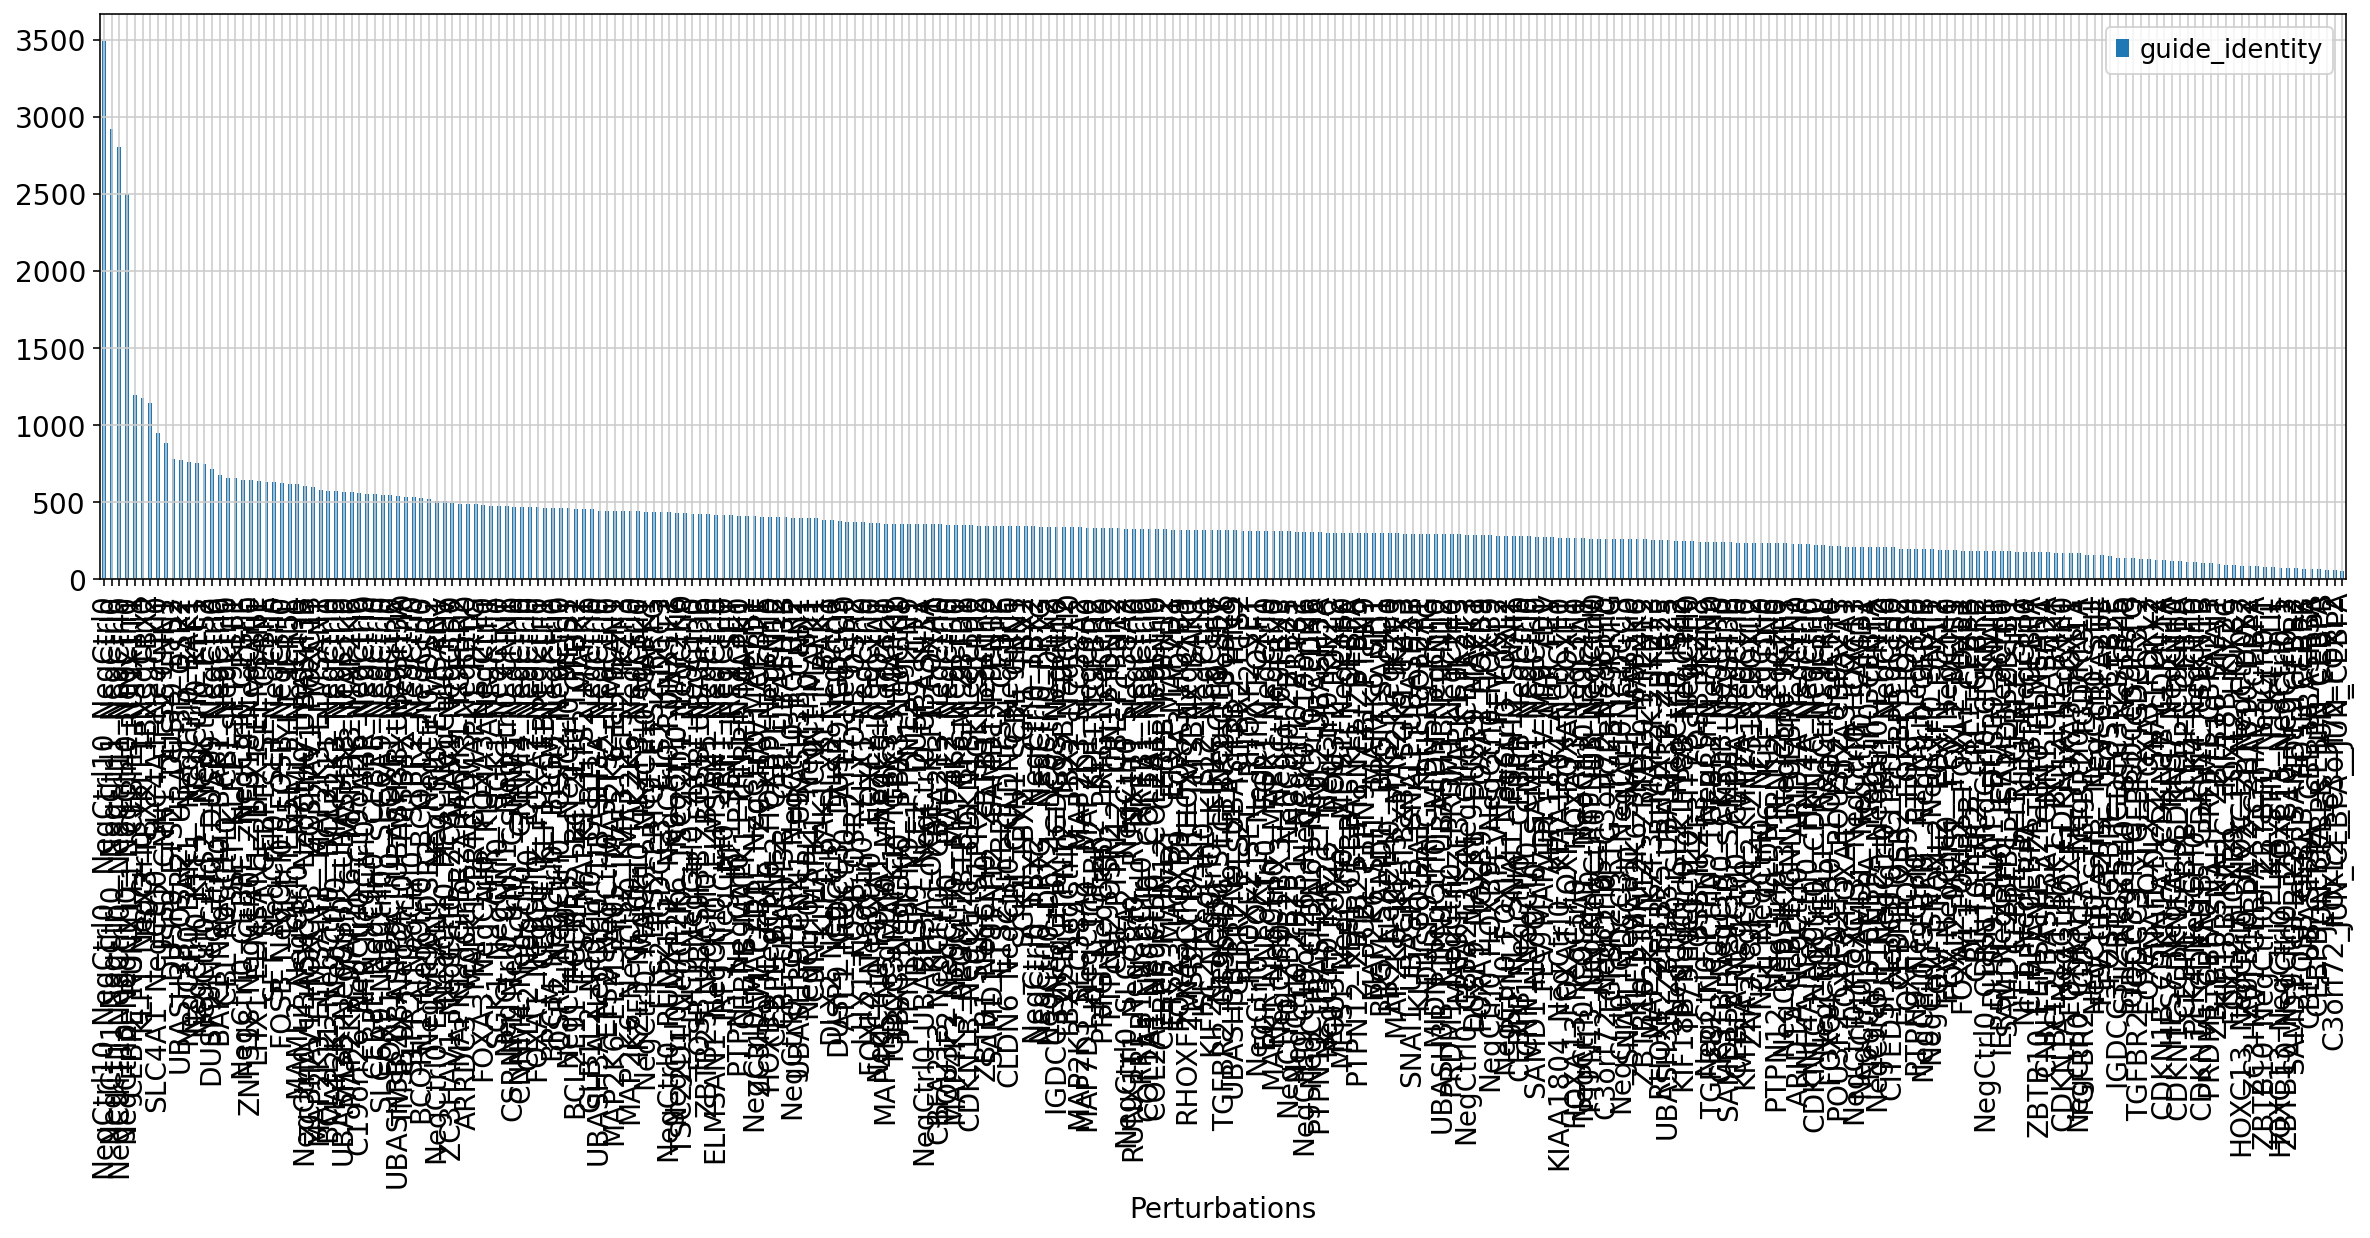

In [86]:
pdpd_kept_perturb.plot.bar(x = 'Perturbations', y = 'guide_identity')

# Cells by Perturbations: Frequency and Dictionary

In [88]:
pd_kept_cells_kept.head()

,cell_ids,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252.0,67.0,18.686567,1.0,True,2.0
1,AAACCTGAGGCATGTG-1,AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151.0,104.0,20.682692,1.0,True,1.0
2,AAACCTGAGGCCCTTG-1,AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037.0,59.0,17.576271,1.0,True,1.0
3,AAACCTGCACGAAGCA-1,AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958.0,39.0,24.564103,1.0,True,1.0
4,AAACCTGCAGACGTAG-1,AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244.0,14.0,17.428571,1.0,True,1.0


In [89]:
pd_kept_cells_kept['guide_identity'].unique()

array(['NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0',
       'TSC22D1_NegCtrl0__TSC22D1_NegCtrl0', 'KLF1_MAP2K6__KLF1_MAP2K6',
       'NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0',
       'CEBPE_RUNX1T1__CEBPE_RUNX1T1', 'MAML2_NegCtrl0__MAML2_NegCtrl0',
       'NegCtrl0_CEBPE__NegCtrl0_CEBPE', 'ETS2_MAP7D1__ETS2_MAP7D1',
       'CBL_PTPN9__CBL_PTPN9', 'LHX1_ELMSAN1__LHX1_ELMSAN1',
       'TGFBR2_ETS2__TGFBR2_ETS2', 'SGK1_TBX3__SGK1_TBX3',
       'DUSP9_NegCtrl0__DUSP9_NegCtrl0', 'MAP2K6_SPI1__MAP2K6_SPI1',
       'NegCtrl0_ELMSAN1__NegCtrl0_ELMSAN1',
       'UBASH3B_NegCtrl0__UBASH3B_NegCtrl0',
       'NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0',
       'UBASH3B_PTPN12__UBASH3B_PTPN12', 'NegCtrl0_FOXA1__NegCtrl0_FOXA1',
       'FOXA3_FOXA1__FOXA3_FOXA1', 'ETS2_IGDCC3__ETS2_IGDCC3',
       'BCORL1_NegCtrl0__BCORL1_NegCtrl0',
       'MEIS1_NegCtrl0__MEIS1_NegCtrl0',
       'GLB1L2_NegCtrl0__GLB1L2_NegCtrl0', 'KLF1_NegCtrl0__KLF1_NegCtrl0',
       'PTPN12_OSR2__PTPN12_OSR2', 'MAP2K6_IKZF3__MAP2K6_IKZF3',

In [90]:
pd_kept_cells_kept['guide_identity'].isnull().sum()

0

# One-hot Encoding


In [91]:
pdpd_kept_perturb.head()

,guide_identity,Perturbations
NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,3494,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0
NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0,2922,NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0
NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0,2806,NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0
NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,2504,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0
CEBPE_RUNX1T1__CEBPE_RUNX1T1,1198,CEBPE_RUNX1T1__CEBPE_RUNX1T1


In [95]:
pd_kept_cells_kept.head()


,cell_ids,cell_barcode,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells
0,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252.0,67.0,18.686567,1.0,True,2.0
1,AAACCTGAGGCATGTG-1,AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151.0,104.0,20.682692,1.0,True,1.0
2,AAACCTGAGGCCCTTG-1,AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037.0,59.0,17.576271,1.0,True,1.0
3,AAACCTGCACGAAGCA-1,AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958.0,39.0,24.564103,1.0,True,1.0
4,AAACCTGCAGACGTAG-1,AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244.0,14.0,17.428571,1.0,True,1.0


In [96]:
perturb_df = pd.DataFrame(0, columns = list(pdpd_kept_perturb['Perturbations']), index = pd_kept_cells_kept['cell_ids'])


In [97]:
pd_perturb = pd.get_dummies(pdpd_kept_perturb['Perturbations'])

In [99]:
pd_perturb.head()

,AHR_FEV__AHR_FEV,AHR_KLF1__AHR_KLF1,AHR_NegCtrl0__AHR_NegCtrl0,ARID1A_NegCtrl0__ARID1A_NegCtrl0,ARRDC3_NegCtrl0__ARRDC3_NegCtrl0,ATL1_NegCtrl0__ATL1_NegCtrl0,BAK1_NegCtrl0__BAK1_NegCtrl0,BCL2L11_BAK1__BCL2L11_BAK1,BCL2L11_NegCtrl0__BCL2L11_NegCtrl0,BCL2L11_TGFBR2__BCL2L11_TGFBR2,...,ZBTB10_PTPN12__ZBTB10_PTPN12,ZBTB10_SNAI1__ZBTB10_SNAI1,ZBTB1_NegCtrl0__ZBTB1_NegCtrl0,ZBTB25_NegCtrl0__ZBTB25_NegCtrl0,ZC3HAV1_CEBPA__ZC3HAV1_CEBPA,ZC3HAV1_CEBPE__ZC3HAV1_CEBPE,ZC3HAV1_HOXC13__ZC3HAV1_HOXC13,ZC3HAV1_NegCtrl0__ZC3HAV1_NegCtrl0,ZNF318_FOXL2__ZNF318_FOXL2,ZNF318_NegCtrl0__ZNF318_NegCtrl0
NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NegCtrl1_NegCtrl0__NegCtrl1_NegCtrl0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NegCtrl11_NegCtrl0__NegCtrl11_NegCtrl0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CEBPE_RUNX1T1__CEBPE_RUNX1T1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
pd_perturb.sum(1).unique()

array([1])

In [101]:
perturb_df.to_csv('GI_y_onehot.csv')

In [102]:
perturb_df.shape

(109738, 290)

In [1]:
109738 * (109738 - 1)/2

6021159453.0

In [3]:
cond_all = pd.read_csv(path_cond)

NameError: name 'pd' is not defined

In [2]:
import numpy as np
import os
path_data = '/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/'
gene = np.load(os.path.join(path_data, 'gene.npy'))
anno = np.load(os.path.join(path_data, 'anno.npy'))

In [3]:
gene

array(['A0A087WT57', 'A0A087WUV0', 'A0A087WVE0', ..., 'ZZZ3',
       'hCG_1642624', 'hCG_2014768'], dtype='<U15')

In [4]:
anno

array(['GO:0000002', 'GO:0000003', 'GO:0000009', ..., 'GO:2001303',
       'GO:2001306', 'GO:2001311'], dtype='<U10')

In [5]:
print(gene.shape)

(18832,)


In [6]:
print(anno.shape)

(15988,)


In [3]:
import pandas as pd
path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/'
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')



In [5]:
perturb_data_pd_rowunique = perturb_data_pd.drop_duplicates()

In [53]:
perturb_data_pd_rowunique.iloc[0, :].nonzero()

AttributeError: 'Series' object has no attribute 'nonzero'

In [6]:
perturb_data_pd_rowunique.shape

(237, 106)

In [67]:
per_col_names = np.array(list(perturb_data_pd_rowunique.columns))

In [66]:
col_names[perturb_data_pd_rowunique.iloc[0, :].apply(lambda x: x > 0)][0]

'ctrl'

In [82]:
list_per_gene = []
anno_per_gene = None
for i in range(perturb_data_pd_rowunique.shape[0]):
    perturb_type = per_col_names[perturb_data_pd_rowunique.iloc[i, :].apply(lambda x: x > 0)]

    if len(perturb_type) == 1:
        per1, per2 = perturb_type[0], perturb_type[0]
    else:
        per1, per2 = perturb_type[0], perturb_type[1]


    anno1 = None
    if per1 in gene_data:
        indice1 = np.where(gene_data == per1)[0][0]
        anno1 = data_npz[[indice1]]

    anno2 = None
    if per2 in gene_data:
        indice2 = np.where(gene_data == per2)[0][0]
        anno2 = data_npz[[indice2]]

    if anno1 is not None and anno2 is not None:
        anno_perturb =  np.logical_or(anno1, anno2).astype(np.float64)
    elif anno1 is None and anno2 is not None:
        anno_perturb = anno2.astype(np.float64)
    elif anno1 is not None and anno2 is None:
        anno_perturb = anno1.astype(np.float64)
    else:
        anno_perturb = None

    if anno_perturb is not None:
        if anno_per_gene is None:
            anno_per_gene = anno_perturb
        else:
            anno_per_gene = np.concatenate([anno_per_gene, anno_perturb], axis = 0)
        list_per_gene.append(per1 + '/' + per2)

In [83]:
len(list_per_gene)

230

In [84]:
anno_per_gene.shape

(230, 15988)

In [85]:
list_per_gene

['TSC22D1/ctrl',
 'KLF1/MAP2K6',
 'CEBPE/RUNX1T1',
 'MAML2/ctrl',
 'CEBPE/ctrl',
 'ETS2/MAP7D1',
 'CBL/PTPN9',
 'ELMSAN1/LHX1',
 'ETS2/TGFBR2',
 'SGK1/TBX3',
 'DUSP9/ctrl',
 'MAP2K6/SPI1',
 'UBASH3B/ctrl',
 'PTPN12/UBASH3B',
 'FOXA1/ctrl',
 'FOXA1/FOXA3',
 'ETS2/IGDCC3',
 'BCORL1/ctrl',
 'MEIS1/ctrl',
 'GLB1L2/ctrl',
 'KLF1/ctrl',
 'OSR2/PTPN12',
 'IKZF3/MAP2K6',
 'BAK1/ctrl',
 'FEV/ctrl',
 'MAP2K3/SLC38A2',
 'ATL1/ctrl',
 'CBL/ctrl',
 'ETS2/ctrl',
 'SET/ctrl',
 'TBX3/ctrl',
 'LHX1/ctrl',
 'FOXA1/KLF1',
 'TBX2/TBX3',
 'SLC4A1/ctrl',
 'RREB1/ctrl',
 'ZNF318/ctrl',
 'DUSP9/MAPK1',
 'COL2A1/ctrl',
 'ZBTB25/ctrl',
 'CEBPE/KLF1',
 'SLC6A9/ctrl',
 'MIDN/ctrl',
 'OSR2/UBASH3B',
 'DLX2/ctrl',
 'UBASH3B/ZBTB25',
 'CBFA2T3/ctrl',
 'HES7/ctrl',
 'DUSP9/ETS2',
 'FOXL2/ZNF318',
 'CEBPE/SET',
 'PTPN9/UBASH3B',
 'IGDCC3/ZBTB25',
 'AHR/ctrl',
 'FOXO4/ctrl',
 'RHOXF2/ctrl',
 'SPI1/ctrl',
 'RUNX1T1/ctrl',
 'S1PR2/ctrl',
 'POU3F2/ctrl',
 'IER5L/LYL1',
 'CNN1/ctrl',
 'IGDCC3/MAPK1',
 'CELF2/ctrl',
 'CEBPA

In [74]:
np.where(gene_data == per1)

(array([], dtype=int64),)

In [43]:
perturb_data_pd_rowunique.iloc[[0], :][perturb_data_pd_rowunique.iloc[[0], :] != 0]

,AHR,ARID1A,ARRDC3,ATL1,BAK1,BCL2L11,BCORL1,BPGM,C19ORF26,C3ORF72,...,TP73,TSC22D1,UBASH3A,UBASH3B,ZBTB1,ZBTB10,ZBTB25,ZC3HAV1,ZNF318,ctrl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [13]:
perturb_list

['ctrl/ctrl',
 'TSC22D1/ctrl',
 'KLF1/MAP2K6',
 'ctrl10/ctrl',
 'CEBPE/RUNX1T1',
 'MAML2/ctrl',
 'ctrl/CEBPE',
 'ETS2/MAP7D1',
 'ctrl/ctrl',
 'CBL/PTPN9',
 'LHX1/ELMSAN1',
 'TGFBR2/ETS2',
 'SGK1/TBX3',
 'DUSP9/ctrl',
 'MAP2K6/SPI1',
 'ctrl/ELMSAN1',
 'UBASH3B/ctrl',
 'ctrl11/ctrl',
 'UBASH3B/PTPN12',
 'ctrl/FOXA1',
 'FOXA3/FOXA1',
 'ETS2/IGDCC3',
 'ctrl10/ctrl',
 'BCORL1/ctrl',
 'MEIS1/ctrl',
 'GLB1L2/ctrl',
 'KLF1/ctrl',
 'PTPN12/OSR2',
 'KLF1/ctrl',
 'MAP2K6/IKZF3',
 'BAK1/ctrl',
 'FEV/ctrl',
 'MAP2K3/SLC38A2',
 'ATL1/ctrl',
 'CBL/ctrl',
 'ctrl/ctrl',
 'ctrl/ETS2',
 'ctrl/FEV',
 'ctrl/SET',
 'TBX3/ctrl',
 'LHX1/ctrl',
 'KLF1/FOXA1',
 'TBX3/TBX2',
 'ctrl/KLF1',
 'DUSP9/ctrl',
 'SLC4A1/ctrl',
 'RREB1/ctrl',
 'ZNF318/ctrl',
 'DUSP9/MAPK1',
 'COL2A1/ctrl',
 'ctrl/ZBTB25',
 'CEBPE/KLF1',
 'UBASH3B/ctrl',
 'ctrl/ETS2',
 'SLC6A9/ctrl',
 'MIDN/ctrl',
 'UBASH3B/OSR2',
 'DLX2/ctrl',
 'UBASH3B/ZBTB25',
 'CBFA2T3/ctrl',
 'MAP2K3/SLC38A2',
 'HES7/ctrl',
 'DUSP9/ETS2',
 'CBL/ctrl',
 'ZNF318/FOXL2'

In [16]:
path_geneanno = "/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/"
gene_data = np.load(os.path.join(path_geneanno, 'gene.npy'))

In [21]:
gene_data.shape

(18832,)

In [20]:
'A0A087WUV01' in gene_data

False

In [22]:
from scipy.sparse import load_npz
data_npz = load_npz(os.path.join(path_geneanno, 'sparse_gene_anno_matrix.npz')).toarray()

In [24]:
d1, d2 = data_npz[[1]], data_npz[[2]]

In [26]:
d1.shape

(1, 15988)

In [31]:
d3 = np.logical_or(d1, d2) * 1

In [32]:
d3

array([[0, 0, 0, ..., 0, 0, 0]])

In [35]:
d1.astype(np.float64)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [37]:
perturb_data_pd

,AHR,ARID1A,ARRDC3,ATL1,BAK1,BCL2L11,BCORL1,BPGM,C19ORF26,C3ORF72,...,TP73,TSC22D1,UBASH3A,UBASH3B,ZBTB1,ZBTB10,ZBTB25,ZC3HAV1,ZNF318,ctrl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109735,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Perturbation properties

In [1]:
import numpy as np
import pandas as pd
import os
from anndata import AnnData
from scipy import stats, sparse

path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/'
adataX = sparse.load_npz(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataCSRMatrix.npz'))
dataOBS = pd.read_csv(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv'))
dataVAR = pd.read_csv(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv'))

dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

adataAll = AnnData(X = adataX, var = dataVARU, obs = dataOBSU)


In [2]:
adataX.shape

(109738, 2279)

In [2]:
meta = adataAll.obs

In [3]:
meta.head()

,n_genes,percent_mito,n_counts
cell_ids,,,
AAACCTGAGAAGAAGC-1,4108,0.068356,19413.0
AAACCTGAGGCATGTG-1,3142,0.071397,13474.0
AAACCTGAGGCCCTTG-1,4229,0.066644,23228.0
AAACCTGCACGAAGCA-1,2114,0.076440,6842.0
AAACCTGCAGACGTAG-1,2753,0.097809,9130.0


In [4]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI'

data_meta = pd.read_csv('cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv')

In [5]:
data_meta.shape

(109738, 5)

In [6]:
data_meta.head()

,Unnamed: 0,perturbation,Group,Cluster,Perturb
0,0,ctrl/ctrl,NaN,NaN,NaN
1,1,TSC22D1/ctrl,NaN,NaN,NaN
2,2,KLF1/MAP2K6,PRO-GROWTH,Cluster2,KLF1/MAP2K6
3,3,ctrl10/ctrl,NaN,NaN,NaN
4,4,CEBPE/RUNX1T1,GRANULOCYTE/APOPTOSIS,Cluster7,CEBPE/RUNX1T1


In [7]:
meta.shape

(109738, 3)

In [8]:
data_meta.isna().sum(0)

Unnamed: 0          0
perturbation        0
Group           65226
Cluster         65226
Perturb         65226
dtype: int64

In [9]:
dictCluster = {"PRO-GROWTH": 
    {
    "Cluster1": ["AHR/KLF1", "ctrl/KLF1", "KLF1/ctrl", "KLF1/TGFBR2", "KLF1/BAK1", "CEBPE/KLF1"], 
    "Cluster2": ["MAP2K6/ctrl", "ctrl/MAP2K6", "MAP2K6/ELMSAN1", "MAP2K3/MAP2K6", "KLF1/MAP2K6", "ctrl/ELMSAN1", 
                 "MAP2K3/ctrl", "MAP2K3/ELMSAN1", "ELMSAN1/ctrl", "MAP2K3/SLC38A2"]
    }, 
               "MEGAKARYOCYTE": 
    {
        "Cluster3": ["TGFBR2/IGDCC3", "ctrl/IGDCC3", "IGDCC3/ctrl", "PRTG/ctrl", "TGFBR2/PRTG", "ETS2/PRTG", 
                     "ctrl/PRTG", "ETS2/IGDCC3", "MAPK1/PRTG", "IGDCC3/MAPK1"],
        "Cluster4": ["MAPK1/TGFBR2", "MAPK1/ctrl", "ctrl/ETS2", "ctrl/MAPK1", "ETS2/MAPK1", "CEBPB/MAPK1"], 
        "Cluster5": ["COL2A1/ctrl", "KLF1/COL2A1", "COL1A1/ctrl", "ctrl/COL2A1"]
    },
               "GRANULOCYTE/APOPTOSIS": 
    {
        "Cluster6": ["FEV/ISL2", "ctrl/FEV", "FEV/ctrl", "AHR/FEV", "FEV/CBFA2T3"], 
        "Cluster7": ["CEBPE/RUNX1T1", "CEBPE/ctrl", "ctrl/CEBPE", "KLF1/CEBPA", "ctrl/CEBPA", "ETS2/CEBPE", 
                     "CEBPA/ctrl", "FOSB/CEBPE", "CEBPB/ctrl", "CEBPE/CEBPB", "ctrl/CEBPB",  "CEBPB/CEBPA", 
                     "CEBPE/CEBPA", "ZC3HAV1/CEBPA", "FOSB/CEBPB", "CEBPE/SPI1", "SPI1/ctrl", "ctrl/SPI1"]
    }, 
               "PIONEER FACTORS":
    {
        "Cluster8": ["MAP2K6/IKZF3", "MAPK1/IKZF3", "MAP2K3/IKZF3", "ETS2/IKZF3", "FOSB/IKZF3", "ctrl/IKZF3", 
                     "POU3F2/CBFA2T3", "IKZF3/ctrl"], 
        "Cluster9": ["FOXA3/FOXL2", "MIDN/ctrl", "TP73/ctrl", "FOXA1/FOXF1", "FOXA3/FOXF1", "FOXA1/HOXB9", 
                     "FOXF1/FOXL2", "FOXA3/FOXA1", "FOXA3/ctrl", "FOXA1/FOXL2", "FOXA3/HOXB9", "FOXF1/HOXB9", 
                     "FOXL2/MEIS1", "POU3F2/FOXL2", "HOXA13/ctrl", "LYL1/IER5L", "ctrl/HOXC13", "HOXC13/ctrl", "RHOXF2b/ctrl", 
                     "DUSP9/SNAI1", "ZBTB10/SNAI1", "RHOXF2B/SET", "SET/CEBPE", "ctrl/SET", "SET/ctrl", "IRF1/SET"], 
        "Cluster10": ["DUSP9/KLF1", "DUSP9/ETS2", "DUSP9/ctrl", "DUSP9/PRTG", "DUSP9/IGDCC3"]
    }, 
               "ERYTHROID": 
    {
        "Cluster11": ["ATL1/ctrl", "UBASH3B/PTPN12", "CBL/PTPN12", "PTPN12/UBASH3A", "CBL/CNN1", "PTPN12/PTPN9",
                      "PTPN12/ZBTB25", "CNN1/UBASH3A", "BPGM/SAMD1", "SAMD1/PTPN12", "UBASH3B/CNN1", "UBASH3B/ZBTB25", 
                      "SAMD1/UBASH3B", "UBASH3B/PTPN9", "PTPN1/ctrl", "CBL/UBASH3B", "CBL/PTPN9", "UBASH3B/UBASH3A"], 
        "Cluster12":["TBX3/TBX2", "TBX2/ctrl", "ctrl/TBX2", "SGK1/TBX2", "SGK1/ctrl"]
    }, 
               "G1 CELL CYCLE ARREST":
    {
        "Cluster13": ["CDKN1C/CDKN1B", "ctrl/CDKN1A", "CDKN1B/CDKN1A", "CDKN1A/ctrl", "CDKN1C/ctrl", "CDKN1C/CDKN1A", 
                      "CDKN1B/ctrl"]
    }
}

In [12]:
df = pd.concat(pd.DataFrame(dictCluster) for k, v in dictCluster.items())
testdict = {'Cluster1': ['AHR/KLF1', 'ctrl/KLF1', 'KLF1/ctrl', 'KLF1/TGFBR2', 'KLF1/BAK1', 'CEBPE/KLF1'], 'Cluster2': ['MAP2K6/ctrl', 'ctrl/MAP2K6', 'MAP2K6/ELMSAN1', 'MAP2K3/MAP2K6', 'KLF1/MAP2K6', 'ctrl/ELMSAN1', 'MAP2K3/ctrl', 'MAP2K3/ELMSAN1', 'ELMSAN1/ctrl', 'MAP2K3/SLC38A2']}

wholeDf = None
for k, v in dictCluster.items():
    for k1, v1 in v.items():
        dataDf  = pd.DataFrame({
              'Group': k, 
              'Cluster': k1, 
              'Perturb': v1
        })
        if wholeDf is None: 
            wholeDf = dataDf
        else: 
            wholeDf = pd.concat([wholeDf, dataDf], axis = 0)

In [13]:
wholeDf.shape

(128, 3)

In [15]:
wholeDf.to_csv(os.path.join(path_turbo, 'perturb_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))

In [10]:
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')

In [17]:
list_per = list(wholeDf['Perturb'])

In [21]:
data_per = pd.DataFrame(perturb_list_collect)

In [24]:
list_per_reverse = [i.split('/')[1] + '/' + i.split('/')[0] for i in list_per]


In [26]:
wholeDfCopy = wholeDf.copy()
wholeDfCopy['Perturb'] = list_per_reverse

In [27]:
wholeDfAll = pd.concat([wholeDf, wholeDfCopy], axis = 0)
wholeDfAll.head()

,Group,Cluster,Perturb
0,PRO-GROWTH,Cluster1,AHR/KLF1
1,PRO-GROWTH,Cluster1,ctrl/KLF1
2,PRO-GROWTH,Cluster1,KLF1/ctrl
3,PRO-GROWTH,Cluster1,KLF1/TGFBR2
4,PRO-GROWTH,Cluster1,KLF1/BAK1


In [29]:
wholeDfUni = wholeDfAll.drop_duplicates()

In [30]:
wholeDfUni.shape

(222, 3)

In [31]:
wholeDfUni.head()

,Group,Cluster,Perturb
0,PRO-GROWTH,Cluster1,AHR/KLF1
1,PRO-GROWTH,Cluster1,ctrl/KLF1
2,PRO-GROWTH,Cluster1,KLF1/ctrl
3,PRO-GROWTH,Cluster1,KLF1/TGFBR2
4,PRO-GROWTH,Cluster1,KLF1/BAK1


In [32]:
wholeDfUni['Perturb'].unique().shape

(222,)

In [34]:
wholeDfUni.index = list(range(wholeDfUni.shape[0]))

In [36]:
data_per.columns = ["Perturb"]
data_per.head()

,Perturb
0,ctrl/ctrl
1,TSC22D1/ctrl
2,KLF1/MAP2K6
3,ctrl/ctrl
4,CEBPE/RUNX1T1


In [37]:
data_per_info = data_per.merge(wholeDfUni, on = 'Perturb', how = 'left')

In [44]:
data_per_info[data_per_info['Group'].isna()]['Perturb'].unique()

array(['ctrl/ctrl', 'TSC22D1/ctrl', 'MAML2/ctrl', 'ETS2/MAP7D1',
       'LHX1/ELMSAN1', 'TGFBR2/ETS2', 'SGK1/TBX3', 'MAP2K6/SPI1',
       'UBASH3B/ctrl', 'ctrl/FOXA1', 'BCORL1/ctrl', 'MEIS1/ctrl',
       'GLB1L2/ctrl', 'PTPN12/OSR2', 'BAK1/ctrl', 'CBL/ctrl', 'TBX3/ctrl',
       'LHX1/ctrl', 'KLF1/FOXA1', 'SLC4A1/ctrl', 'RREB1/ctrl',
       'ZNF318/ctrl', 'DUSP9/MAPK1', 'ctrl/ZBTB25', 'SLC6A9/ctrl',
       'UBASH3B/OSR2', 'DLX2/ctrl', 'CBFA2T3/ctrl', 'HES7/ctrl',
       'ZNF318/FOXL2', 'IGDCC3/ZBTB25', 'AHR/ctrl', 'FOXO4/ctrl',
       'ctrl/CBFA2T3', 'RHOXF2/ctrl', 'ctrl/RUNX1T1', 'KIAA1804/ctrl',
       'S1PR2/ctrl', 'POU3F2/ctrl', 'ctrl/CNN1', 'CELF2/ctrl',
       'JUN/CEBPA', 'MAP4K3/ctrl', 'ZBTB25/ctrl', 'ctrl/SAMD1',
       'TMSB4X/BAK1', 'ZC3HAV1/CEBPE', 'ctrl/MEIS1', 'ctrl/IER5L',
       'RUNX1T1/ctrl', 'PTPN12/ctrl', 'ctrl/MAP7D1', 'FOSB/ctrl',
       'C19ORF26/ctrl', 'IRF1/ctrl', 'HOXB9/ctrl', 'ctrl/UBASH3B',
       'ctrl/HOXB9', 'CKS1B/ctrl', 'CLDN6/ctrl', 'KIF18B/KIF2C',
    

In [45]:
data_per.shape

(109738, 1)

In [46]:
data_per_info.isna().sum(0)

Perturb        0
Group      64599
Cluster    64599
dtype: int64

# 6 Groups

In [11]:
data = adataAll.X.A

In [12]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
from sklearn.decomposition import PCA
pca_data_50 = PCA(n_components=50, random_state = 42)
pca_data = pca_data_50.fit_transform(data)

In [5]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(pca_data)

In [6]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [7]:
unique, counts = np.unique(y_pred, return_counts=True)


In [8]:
unique

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [9]:
counts

array([44492, 18055,   817,  2547,   646, 43181])

In [10]:
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')

In [11]:
perturb_data_pd_rowunique = perturb_data_pd.drop_duplicates()
perturb_col_names = np.array(list(perturb_data_pd_rowunique.columns))

In [12]:
perturb_type = perturb_col_names[perturb_data_pd_rowunique.iloc[3, :].apply(lambda x: x > 0)]

In [13]:
np.append(np.where(np.array(perturb_list_collect) == 'ctrl/ctrl')[0], 
          np.where(np.array(perturb_list_collect) == 'ctrl/ctrl')[0]).shape

(23452,)

In [14]:
path_geneanno = "/nfs/turbo/umms-welchjd/hengshi/GAN/data/Genotype/"
from scipy.sparse import load_npz
data_npz = load_npz(os.path.join(path_geneanno, 'sparse_gene_anno_matrix.npz')).toarray()
gene_data = np.load(os.path.join(path_geneanno, 'gene.npy'))
anno_data = np.load(os.path.join(path_geneanno, 'anno.npy'))

In [49]:
output = np.zeros((perturb_data_pd_rowunique.shape[0], 6))
perType_list = []
rePerType  = []
use_index = []
output_anno = None
for i in range(perturb_data_pd_rowunique.shape[0]):
    perturb_type = perturb_col_names[perturb_data_pd_rowunique.iloc[i, :].apply(lambda x: x > 0)]

    if len(perturb_type) == 1:
        per1, per2 = perturb_type[0], perturb_type[0]
    else:
        per1, per2 = perturb_type[0], perturb_type[1]
    
    anno1 = None
    if per1 in gene_data:
        indice1 = np.where(gene_data == per1)[0][0]
        anno1 = data_npz[[indice1]]
    
    anno2 = None
    if per2 in gene_data:
        indice2 = np.where(gene_data == per2)[0][0]
        anno2 = data_npz[[indice2]]

    if anno1 is not None and anno2 is not None:
        anno_perturb =  np.logical_or(anno1, anno2).astype(np.float64)
    elif anno1 is None and anno2 is not None:
        anno_perturb = anno2.astype(np.float64)
    elif anno1 is not None and anno2 is None:
        anno_perturb = anno1.astype(np.float64)
    else:
        anno_perturb = None
    
    
    if anno_perturb is not None:
        use_index.append(i)
        if output_anno is None:
            output_anno = anno_perturb
        else:
            output_anno = np.concatenate([output_anno, anno_perturb], axis = 0)
    

    anno2 = None
    if per2 in gene_data:
        indice2 = np.where(gene_data == per2)[0][0]
        anno2 = data_npz[[indice2]]
        
    perType = per1 + "/" + per2
    rePerType = per2 + "/" + per1 
    indi1 = np.where(np.array(perturb_list_collect) == perType)[0]
    indi2 = np.where(np.array(perturb_list_collect) == rePerType)[0]
    if len(perturb_type) != 1:
        indi1 = np.append(indi1, indi2)
    y_has = y_pred[indi1]
    n_total = len(indi1)
    n_list = []
    for val in range(0, 6):
        n_list.append(np.sum(y_has == val))
    output[i, :] = np.array(n_list)
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230


In [50]:
len(use_index )

230

In [51]:
output_anno.shape

(230, 15988)

In [52]:
res = output/output.sum(axis=1)[:,None]

In [53]:
res

array([[0.30121098, 0.18147706, 0.00068224, 0.00997783, 0.00068224,
        0.50596964],
       [0.32332564, 0.16166282, 0.        , 0.01847575, 0.        ,
        0.4965358 ],
       [0.24615385, 0.34615385, 0.        , 0.01538462, 0.00384615,
        0.38846154],
       ...,
       [0.60227273, 0.07386364, 0.        , 0.00568182, 0.        ,
        0.31818182],
       [0.46875   , 0.10267857, 0.        , 0.00892857, 0.        ,
        0.41964286],
       [0.56896552, 0.12068966, 0.        , 0.        , 0.        ,
        0.31034483]])

In [55]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/cluster_property'
np.save(os.path.join(path_turbo, '6_k_means_clusters_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.npy'), res)

In [56]:
np.save(os.path.join(path_turbo, 'anno_6_k_means_clusters_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.npy'), output_anno)
pd.DataFrame(use_index).to_csv(os.path.join(path_turbo, 'indices_with_anno.csv'))


In [43]:
perturb_data_pd_rowunique.shape[0]

237

In [58]:
indices_have_anno = pd.read_csv(os.path.join(path_turbo, 'indices_with_anno.csv'))

In [62]:
res

array([[0.30121098, 0.18147706, 0.00068224, 0.00997783, 0.00068224,
        0.50596964],
       [0.32332564, 0.16166282, 0.        , 0.01847575, 0.        ,
        0.4965358 ],
       [0.24615385, 0.34615385, 0.        , 0.01538462, 0.00384615,
        0.38846154],
       ...,
       [0.60227273, 0.07386364, 0.        , 0.00568182, 0.        ,
        0.31818182],
       [0.46875   , 0.10267857, 0.        , 0.00892857, 0.        ,
        0.41964286],
       [0.56896552, 0.12068966, 0.        , 0.        , 0.        ,
        0.31034483]])

In [63]:
output_anno

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# whole data
output = np.zeros((len(perturb_list_collect), 6))

for i, perturb_type in enumerate(perturb_list_collect):

    per1, per2 = perturb_type.split('/')
    other_per_type = per2 + '/' + per1

        
    indi1 = np.where(np.array(perturb_list_collect) == perturb_type)[0]
    indi2 = np.where(np.array(perturb_list_collect) == other_per_type)[0]
    if per1 != per2:
        indi1 = np.append(indi1, indi2)
    y_has = y_pred[indi1]
    n_total = len(indi1)
    n_list = []
    for val in range(0, 6):
        n_list.append(np.sum(y_has == val))
    output[i, :] = np.array(n_list)
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000


In [19]:
res = output/output.sum(axis=1)[:,None]

In [20]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/cluster_property'
np.save(os.path.join(path_turbo, '6_k_means_clusters_All_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.npy'), res)

In [22]:
res

array([[3.01210984e-01, 1.81477060e-01, 6.82244585e-04, 9.97782705e-03,
        6.82244585e-04, 5.05969640e-01],
       [3.23325635e-01, 1.61662818e-01, 0.00000000e+00, 1.84757506e-02,
        0.00000000e+00, 4.96535797e-01],
       [2.46153846e-01, 3.46153846e-01, 0.00000000e+00, 1.53846154e-02,
        3.84615385e-03, 3.88461538e-01],
       ...,
       [3.72623574e-01, 1.57794677e-01, 0.00000000e+00, 1.90114068e-03,
        0.00000000e+00, 4.67680608e-01],
       [7.45173745e-01, 5.79150579e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.96911197e-01],
       [4.08450704e-01, 1.38028169e-01, 0.00000000e+00, 1.12676056e-02,
        0.00000000e+00, 4.42253521e-01]])

In [26]:
np.log(res/(1-res) + 1e-8)

array([[-8.41537873e-01, -1.50637213e+00, -7.28942521e+00,
        -4.59736101e+00, -7.28942521e+00,  2.38797049e-02],
       [-7.38530165e-01, -1.64590754e+00, -1.84206807e+01,
        -3.97264710e+00, -1.84206807e+01, -1.38570245e-02],
       [-1.11923155e+00, -6.35988748e-01, -1.84206807e+01,
        -4.15888244e+00, -5.55682547e+00, -4.53783670e-01],
       ...,
       [-5.20977978e-01, -1.67472911e+00, -1.84206807e+01,
        -6.26339301e+00, -1.84206807e+01, -1.29458056e-01],
       [ 1.07303545e+00, -2.78911786e+00, -1.84206807e+01,
        -1.84206807e+01, -1.84206807e+01, -1.40571241e+00],
       [-3.70373774e-01, -1.83176474e+00, -1.84206807e+01,
        -4.47449098e+00, -1.84206807e+01, -2.32021213e-01]])

# Pairwise Wasserstain Distances

In [1]:
# import data
import numpy as np
import pandas as pd
import os
from anndata import AnnData
from scipy import stats, sparse

path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/'
adataX = sparse.load_npz(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataCSRMatrix.npz'))
dataOBS = pd.read_csv(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataOBS.csv'))
dataVAR = pd.read_csv(os.path.join(path_data, 'GI_processed_KeptPerturb_RAW_LibraryCheck_adataVAR.csv'))

dataOBSU = dataOBS.set_index('cell_ids')
dataVARU = dataVAR.set_index('Unnamed: 0')

adataAll = AnnData(X = adataX, var = dataVARU, obs = dataOBSU)

path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI'

data_meta = pd.read_csv('cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv')

In [2]:
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')

In [3]:
perturb_data_pd_rowunique = perturb_data_pd.drop_duplicates()
perturb_col_names = np.array(list(perturb_data_pd_rowunique.columns))

In [4]:
perturb_type = perturb_col_names[perturb_data_pd_rowunique.iloc[0, :].apply(lambda x: x > 0)]

In [5]:
perturb_type

array(['ctrl'], dtype='<U8')

In [6]:
perturb_type = perturb_list_collect[0]

In [7]:
indi1 = np.where(np.array(perturb_list_collect) == perturb_type)[0]

In [8]:
data = adataAll.X.A

In [9]:
import ot

In [10]:
import scvi
path_scvi_model = "/nfs/turbo/umms-welchjd/hengshi/perturb_gan/20201118/scVI_GI_k562/models/"
scvi.data.setup_anndata(adataAll)
scvi_model = scvi.model.SCVI.load(path_scvi_model, adataAll, use_cuda = False)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 109738 cells, 2279 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Registered keys:['X', 'batch_indices', 'local_l_mea

In [11]:
x1 = scvi_model.get_latent_representation(indices = indi1, give_mean = False)
x2 = scvi_model.get_latent_representation(indices = indi1, give_mean = False)
avec, bvec = np.ones((x1.shape[0],)) / x1.shape[0], np.ones((x2.shape[0],)) / x2.shape[0]

In [12]:

M1 = ot.dist(x1, x2, metric='euclidean')
M2 = ot.dist(x1, x2)
G01 = ot.emd2(avec, bvec, M1)
G02 = ot.emd2(avec, bvec, M2)

/home/hengshi/.local/lib/python3.8/site-packages/ot/lp/__init__.py:421: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


In [13]:
G01, G02

(1.281330531015741, 1.7714403453294962)

In [14]:
perturb_col_names[perturb_data_pd_rowunique.iloc[0, :].apply(lambda x: x > 0)]

array(['ctrl'], dtype='<U8')

## Mean Representations

In [11]:
G01_mat = np.zeros((perturb_data_pd_rowunique.shape[0], perturb_data_pd_rowunique.shape[0]))
G02_mat = np.zeros((perturb_data_pd_rowunique.shape[0], perturb_data_pd_rowunique.shape[0]))

for i in range(perturb_data_pd_rowunique.shape[0]):
    
    perturb_type1 = perturb_col_names[perturb_data_pd_rowunique.iloc[i, :].apply(lambda x: x > 0)]
    
    if len(perturb_type1) == 1:
        per1, per2 = perturb_type1[0], perturb_type1[0]
    else:
        per1, per2 = perturb_type1[0], perturb_type1[1]
    
    perturb1 = per1 + '/' + per2
    other_perturb1 = per2 + '/' + per1
        
    indi1 = np.where(np.array(perturb_list_collect) == perturb1)[0]
    indi2 = np.where(np.array(perturb_list_collect) == other_perturb1)[0]
    if per1 != per2:
        indi1 = np.append(indi1, indi2)
    x1 = scvi_model.get_latent_representation(indices = indi1, give_mean = True)
    avec = np.ones((x1.shape[0],)) / x1.shape[0]
    
    for j in range(i, perturb_data_pd_rowunique.shape[0]):
        perturb_type2 = perturb_col_names[perturb_data_pd_rowunique.iloc[j, :].apply(lambda x: x > 0)]
        
        if len(perturb_type2) == 1:
            per21, per22 = perturb_type2[0], perturb_type2[0]
        else:
            per21, per22 = perturb_type2[0], perturb_type2[1]

        perturb2 = per21 + '/' + per22
        other_perturb2 = per22 + '/' + per21

        indi21 = np.where(np.array(perturb_list_collect) == perturb2)[0]
        indi22 = np.where(np.array(perturb_list_collect) == other_perturb2)[0]
        if per21 != per22:
            indi21 = np.append(indi21, indi22)
        x2 = scvi_model.get_latent_representation(indices = indi21, give_mean = True)
        
        bvec = np.ones((x2.shape[0],)) / x2.shape[0]
        
        M1 = ot.dist(x1, x2, metric='euclidean')
        M2 = ot.dist(x1, x2)
        G01 = ot.emd2(avec, bvec, M1)
        G02 = ot.emd2(avec, bvec, M2)
        
        G01_mat[i,j] = G01
        G02_mat[i,j] = G02
    
    if i % 20 == 10:
        print(i)

/home/hengshi/.local/lib/python3.8/site-packages/ot/lp/__init__.py:421: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


10
30
50
70
90
110
130
150
170
190
210
230


In [ ]:
G01_mat_copy = G01_mat.copy()
G02_mat_copy = G02_mat.copy()

for i in range(G01_mat_copy.shape[0] - 1):
    for j in range(i + 1, G01_mat_copy.shape[0]):
        G01_mat_copy[j,i] = G01_mat_copy[i,j]
        G02_mat_copy[j,i] = G02_mat_copy[i,j]

In [ ]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
np.save(os.path.join(path_turbo, 'wass_1_mat_meanRep.npy'), G01_mat_copy)
np.save(os.path.join(path_turbo, 'wass_2_mat_meanRep.npy'), G02_mat_copy)

In [2]:
import numpy as np
import os
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
G01_mat_copy = np.load(os.path.join(path_turbo, 'wass_1_mat_meanRep.npy'))
G02_mat_copy = np.load(os.path.join(path_turbo, 'wass_2_mat_meanRep.npy'))

In [3]:
A1 = np.exp(-G01_mat_copy)
A2 = np.exp(-G02_mat_copy)

A1_adj = A1 / A1.sum(axis=1)[:, np.newaxis]

A2_adj = A2 / A2.sum(axis=1)[:, np.newaxis]

A1_L = np.eye(A1_adj.shape[0]) - A1_adj
A2_L = np.eye(A2_adj.shape[0]) - A2_adj

np.save(os.path.join(path_turbo, 'lap_1_mat_meanRep.npy'), A1_L)
np.save(os.path.join(path_turbo, 'lap_2_mat_meanRep.npy'), A2_L)

## Sampled Representations

In [15]:
G01_mat = np.zeros((perturb_data_pd_rowunique.shape[0], perturb_data_pd_rowunique.shape[0]))
G02_mat = np.zeros((perturb_data_pd_rowunique.shape[0], perturb_data_pd_rowunique.shape[0]))

for i in range(perturb_data_pd_rowunique.shape[0]):
    
    perturb_type1 = perturb_col_names[perturb_data_pd_rowunique.iloc[i, :].apply(lambda x: x > 0)]
    
    if len(perturb_type1) == 1:
        per1, per2 = perturb_type1[0], perturb_type1[0]
    else:
        per1, per2 = perturb_type1[0], perturb_type1[1]
    
    perturb1 = per1 + '/' + per2
    other_perturb1 = per2 + '/' + per1
        
    indi1 = np.where(np.array(perturb_list_collect) == perturb1)[0]
    indi2 = np.where(np.array(perturb_list_collect) == other_perturb1)[0]
    if per1 != per2:
        indi1 = np.append(indi1, indi2)
    x1 = scvi_model.get_latent_representation(indices = indi1, give_mean = False)
    avec = np.ones((x1.shape[0],)) / x1.shape[0]
    
    for j in range(i, perturb_data_pd_rowunique.shape[0]):
        perturb_type2 = perturb_col_names[perturb_data_pd_rowunique.iloc[j, :].apply(lambda x: x > 0)]
        
        if len(perturb_type2) == 1:
            per21, per22 = perturb_type2[0], perturb_type2[0]
        else:
            per21, per22 = perturb_type2[0], perturb_type2[1]

        perturb2 = per21 + '/' + per22
        other_perturb2 = per22 + '/' + per21

        indi21 = np.where(np.array(perturb_list_collect) == perturb2)[0]
        indi22 = np.where(np.array(perturb_list_collect) == other_perturb2)[0]
        if per21 != per22:
            indi21 = np.append(indi21, indi22)
        x2 = scvi_model.get_latent_representation(indices = indi21, give_mean = False)
        
        bvec = np.ones((x2.shape[0],)) / x2.shape[0]
        
        M1 = ot.dist(x1, x2, metric='euclidean')
        M2 = ot.dist(x1, x2)
        G01 = ot.emd2(avec, bvec, M1)
        G02 = ot.emd2(avec, bvec, M2)
        
        G01_mat[i,j] = G01
        G02_mat[i,j] = G02
    
    if i % 20 == 10:
        print(i)

10
30
50
70
90
110
130
150
170
190
210
230


In [17]:
G01_mat_copy = G01_mat.copy()
G02_mat_copy = G02_mat.copy()

In [18]:
pwd

'/gpfs/accounts/welchjd_root/welchjd/hengshi/GAN/perturb_gan/data/GI'

In [19]:
for i in range(G01_mat_copy.shape[0] - 1):
    for j in range(i + 1, G01_mat_copy.shape[0]):
        G01_mat_copy[j,i] = G01_mat_copy[i,j]
        G02_mat_copy[j,i] = G02_mat_copy[i,j]

In [23]:
(G02_mat_copy == 0).sum()

0

In [25]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
np.save(os.path.join(path_turbo, 'wass_1_mat.npy'), G01_mat_copy)
np.save(os.path.join(path_turbo, 'wass_2_mat.npy'), G02_mat_copy)

In [3]:
import numpy as np
import os
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
G01_mat_copy = np.load(os.path.join(path_turbo, 'wass_1_mat.npy'))

In [4]:
import matplotlib
import matplotlib.pyplot as plt

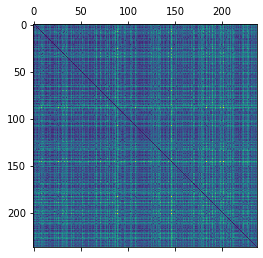

In [5]:
plt.matshow(G01_mat_copy)
plt.show()

In [6]:
G01_mat_copy

array([[1.28153173, 1.74864393, 2.6048738 , ..., 2.80284962, 2.27701155,
        2.72818963],
       [1.74864393, 1.57693741, 2.66797112, ..., 2.65257948, 2.20926956,
        2.69904924],
       [2.6048738 , 2.66797112, 1.63400283, ..., 3.52257094, 2.94382202,
        3.67966461],
       ...,
       [2.80284962, 2.65257948, 3.52257094, ..., 1.6176936 , 2.94788002,
        2.87620727],
       [2.27701155, 2.20926956, 2.94382202, ..., 2.94788002, 1.60657997,
        3.0075798 ],
       [2.72818963, 2.69904924, 3.67966461, ..., 2.87620727, 3.0075798 ,
        1.71484267]])

In [9]:
a = []
b = []
for i in range(len(G01_mat_copy)):
    for j in range(len(G01_mat_copy)):
        if i == j:
            a.append(G01_mat_copy[i,j])
        elif i > j:
            b.append(G01_mat_copy[i,j])

(array([ 2.,  3., 10., 24., 28., 57., 65., 33.,  9.,  6.]),
 array([1.28153173, 1.32929657, 1.37706142, 1.42482626, 1.47259111,
        1.52035595, 1.5681208 , 1.61588564, 1.66365048, 1.71141533,
        1.75918017]),
 <a list of 10 Patch objects>)

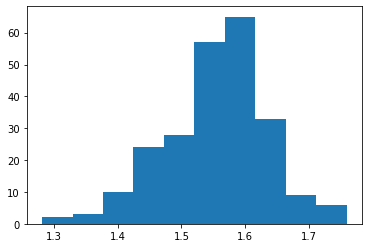

In [12]:
plt.hist(a)


(array([1.775e+03, 6.574e+03, 8.721e+03, 6.629e+03, 2.911e+03, 1.115e+03,
        2.000e+02, 2.800e+01, 9.000e+00, 4.000e+00]),
 array([1.58117962, 2.07436274, 2.56754586, 3.06072899, 3.55391211,
        4.04709523, 4.54027835, 5.03346148, 5.5266446 , 6.01982772,
        6.51301085]),
 <a list of 10 Patch objects>)

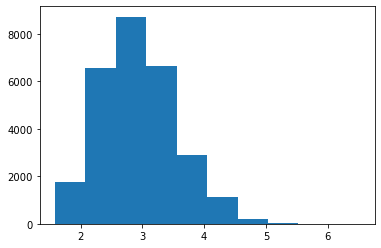

In [13]:
plt.hist(b)

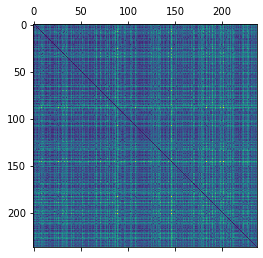

In [14]:
plt.matshow(G01_mat_copy)
plt.show()

In [30]:
perturb_type1_list = []
perturb_type2_list = []

for i in range(perturb_data_pd_rowunique.shape[0]):
    
    perturb_type1 = perturb_col_names[perturb_data_pd_rowunique.iloc[i, :].apply(lambda x: x > 0)]
    
    if len(perturb_type1) == 1:
        per1, per2 = perturb_type1[0], perturb_type1[0]
    else:
        per1, per2 = perturb_type1[0], perturb_type1[1]
    perturb1 = per1 + '/' + per2
    other_perturb1 = per2 + '/' + per1
    
    perturb_type1_list.append(perturb1)
    perturb_type2_list.append(other_perturb1)

In [33]:
pd.DataFrame({'Perturb1': perturb_type1_list, 'Perturb2': perturb_type2_list}).to_csv(os.path.join(path_turbo, 'PerturbInfo.csv'))

In [3]:
import numpy as np
import os

In [5]:
path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
G01_mat_copy = np.load(os.path.join(path_turbo, 'wass_1_mat.npy'))
G02_mat_copy = np.load(os.path.join(path_turbo, 'wass_2_mat.npy'))

In [7]:
A1 = np.exp(-G01_mat_copy)
A2 = np.exp(-G02_mat_copy)

In [8]:

A1_adj = A1 / A1.sum(axis=1)[:, np.newaxis]

A2_adj = A2 / A2.sum(axis=1)[:, np.newaxis]

In [16]:
A1_L = np.eye(A1_adj.shape[0]) - A1_adj
A2_L = np.eye(A2_adj.shape[0]) - A2_adj

In [17]:
np.save(os.path.join(path_turbo, 'lap_1_mat.npy'), A1_L)
np.save(os.path.join(path_turbo, 'lap_2_mat.npy'), A2_L)

In [12]:
import pandas as pd
import numpy as np
path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/'
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')

perturb_data_pd_rowunique = perturb_data_pd.drop_duplicates()
perturb_col_names = np.array(list(perturb_data_pd_rowunique.columns))


In [13]:
indices_with_onehot_data = pd.read_csv(os.path.join(path_data, 'indices_with_onehot_cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
indices_with_onehot = list(indices_with_onehot_data.iloc[:, 1])

In [14]:
perturb_with_onehot = np.array(perturb_list_collect)[indices_with_onehot]

In [2]:
import pandas as pd
import os

path_turbo = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/wass_distance'
data_perturb = pd.read_csv(os.path.join(path_turbo, 'PerturbInfo.csv'))

In [3]:
data_perturb.head()


,Unnamed: 0,Perturb1,Perturb2
0,0,ctrl/ctrl,ctrl/ctrl
1,1,TSC22D1/ctrl,ctrl/TSC22D1
2,2,KLF1/MAP2K6,MAP2K6/KLF1
3,3,CEBPE/RUNX1T1,RUNX1T1/CEBPE
4,4,MAML2/ctrl,ctrl/MAML2


In [7]:
data_perturb_dict = {}
for i in range(data_perturb.shape[0]):
    data_perturb_dict[data_perturb['Perturb1'][i]] = data_perturb['Unnamed: 0'][i]
    data_perturb_dict[data_perturb['Perturb2'][i]] = data_perturb['Unnamed: 0'][i]

In [6]:
data_perturb['Unnamed: 0'][1]

1

In [10]:
import numpy as np
L_matrix = np.load(os.path.join(path_turbo, 'lap_1_mat.npy'))

In [34]:
import torch
test = torch.tensor(np.ones_like(perturb_with_onehot[:128], dtype = np.float32))

In [25]:
inx = []
for i in test:
    inx.append(data_perturb_dict[i])

In [33]:
np.ones_like(perturb_with_onehot[:128], dtype = np.float32)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [24]:
data_perturb_dict[i]

94

In [39]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
L_matrix[inx, inx]

array([0.99065342, 0.98275306, 0.98438808, 0.98983756, 0.97859384,
       0.981958  , 0.98873069, 0.97708573, 0.98781807, 0.97893919,
       0.98093844, 0.9858792 , 0.98978231, 0.98651173, 0.98988261,
       0.9854383 , 0.98489509, 0.99042334, 0.99033652, 0.99015331,
       0.97920558, 0.98760823, 0.97920558, 0.98271313, 0.98931772,
       0.97300046, 0.98760029, 0.98859354, 0.99013803, 0.98448506,
       0.97300046, 0.97121298, 0.97993888, 0.98387477, 0.98108892,
       0.96994078, 0.97920558, 0.98093844, 0.97641074, 0.99057309,
       0.99049365, 0.98916397, 0.96967925, 0.99013547, 0.9813415 ,
       0.98978231, 0.98448506, 0.98917957, 0.98850917, 0.98456015,
       0.9877674 , 0.98761092, 0.98972991, 0.98760029, 0.98196639,
       0.985343  , 0.99013803, 0.99033038, 0.97338983, 0.98778593,
       0.99015331, 0.98466492, 0.98964266, 0.99025891, 0.98978231,
       0.98972991, 0.9887915 , 0.97800364, 0.98975382, 0.98447784,
       0.98456015, 0.99027342, 0.98857076, 0.98854684, 0.98277

In [40]:
class ConcatDatasetWithIndices(torch.utils.data.Dataset):
	def __init__(self, *datasets):
		self.datasets = datasets

	def __getitem__(self, i):
		return tuple([d[i] for d in self.datasets] + [i])

	def __len__(self):
		return min(len(d) for d in self.datasets)

In [66]:
batch_size_small = 250
n_vae = 1000
n_vae_train = int(n_vae * 0.8)
n_vae_test = n_vae - n_vae_train

# a random split of train and validation datasets
random_vae_state = np.random.RandomState(seed = 123)
permutation_vae = random_vae_state.permutation(n_vae)
indices_vae_test, indices_vae_train = permutation_vae[:n_vae_test], permutation_vae[n_vae_test:]

idx_with_onehot_train = torch.tensor(np.array([indices_vae_train]).reshape(-1))
idx_with_onehot_test =  torch.tensor(np.array([indices_vae_test]).reshape(-1))

train_prop_loader = torch.utils.data.DataLoader(
    ConcatDatasetWithIndices(idx_with_onehot_train, 
        idx_with_onehot_train),
    batch_size = batch_size_small, 
    shuffle = True)

test_prop_loader = torch.utils.data.DataLoader(
    ConcatDatasetWithIndices(idx_with_onehot_test, 
        idx_with_onehot_test),
    batch_size = batch_size_small, 
    shuffle = True)

In [67]:
for batch_idx, (batch_anno, batch_prop, indices) in enumerate(train_prop_loader):
    print(batch_idx)

0
1
2
3


In [75]:
perturb_with_onehot[batch_prop[0].item()]

'ctrl/KLF1'

In [69]:
batch_anno.shape

torch.Size([50])

In [56]:
idx_with_onehot_train.shape


torch.Size([1, 800])

In [59]:
np.array([indices_vae_train]).reshape(-1).shape

(800,)

In [71]:
800 % 250

50

In [77]:
batch_prop.shape[0]

50

In [22]:
import numpy as np
a = np.array([2,3,1,4,3, 2, 5, 2, 3])

In [23]:
k = 5
b = a.argsort()[:k]

In [24]:
a

array([2, 3, 1, 4, 3, 2, 5, 2, 3])

In [25]:
b

array([2, 0, 5, 7, 1])

In [26]:
a[b]

array([1, 2, 2, 2, 3])

In [21]:
a.argsort()[:k]

array([2, 0, 5, 7, 1])

In [1]:
from scipy import stats, sparse
adataX = sparse.load_npz('GI_processed_KeptPerturb_RAW_LibraryCheck_adataCSRMatrix.npz')

In [2]:
adataX

<109738x2279 sparse matrix of type '<class 'numpy.float32'>'
	with 26096844 stored elements in Compressed Sparse Row format>

# indices with onehot including unper

In [4]:
import os
import pandas as pd
import numpy as np

import anndata as ad


path_data = '/nfs/turbo/umms-welchjd/hengshi/perturb_gan/data/GI/'

In [5]:
cond_all = pd.read_csv(os.path.join(path_data, 'cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
null_per_category = ['ctrl/ctrl', 'ctrl1/ctrl', 'ctrl10/ctrl', 'ctrl11/ctrl']
single_null_per_category = ['ctrl', 'ctrl1', 'ctrl10', 'ctrl11']

perturb_list = list(cond_all['perturbation'])
perturb1_list = []
perturb2_list = []
for i in range(len(perturb_list)):
    per1, per2 = perturb_list[i].split("/")
    perturb1_list.append(per1)
    perturb2_list.append(per2)

perturb1_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb1_list]
perturb2_list_collect = ['ctrl' if i in single_null_per_category else i for i in perturb2_list]

perturb_list_collect = [perturb1_list_collect[i] + "/" + perturb2_list_collect[i] for i in range(len(perturb2_list_collect))]


In [11]:
indices_unper = np.where(np.array(perturb_list_collect) == 'ctrl/ctrl')[0]
indices_with_onehot_data = pd.read_csv(os.path.join(path_data, 'indices_with_onehot_cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.csv'))
indices_with_onehot = list(indices_with_onehot_data.iloc[:, 1])

In [12]:
len(indices_with_onehot)

94676

In [13]:
np.intersect1d(indices_with_onehot, indices_unper)

array([], dtype=int64)

In [14]:
indices_with_onehot = indices_with_onehot + [i for i in indices_unper]

In [15]:
len(indices_with_onehot)

106402

In [16]:
data_gi_onehot_all = np.load(os.path.join(path_data, "onehot_per_cell_meta_Annotated_KeptPerturb_RAW_LibraryCheck_PyThon37.npy"))

In [17]:
cond_all.shape, data_gi_onehot_all.shape

((109738, 5), (109738, 15988))

In [20]:
(data_gi_onehot_all[indices_unper] != 0).sum()

0

In [21]:
perturb_data_pd = pd.Series(perturb_list_collect).str.get_dummies("/")
perturb_data = perturb_data_pd.values.astype('float64')

perturb_data_pd_rowunique = perturb_data_pd.drop_duplicates()
perturb_col_names = np.array(list(perturb_data_pd_rowunique.columns))

# treatment embedding
trt_list = np.load(os.path.join(path_data, "UniqueFromGeneAnnoOnehotTrt.csv.npy"))
data_gi_onehot = np.load(os.path.join(path_data, "UniqueFromGeneAnnoOnehot.csv.npy"))


In [24]:
(trt_list == 'ctrl/ctrl').sum()
 

0

In [29]:
data_gi_onehot.shape

(230, 15988)